In [1]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\fonttools-4.43.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\nikhi\anaconda3\lib\site-packages\mlgeneric-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [2]:
import pandas as pd
import calendar

#data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("ticks")
sns.set_context("poster");
import plotly.express as px
from scipy.stats import norm

from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Loading the dataset
bike = pd.read_csv("Bike sharing.csv")

In [4]:
bike

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49  

[17379 rows x 17 columns]

In [5]:
bike.shape

(17379, 17)

In [6]:
#to check the datatypes of dataset
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# to get the discriptive analytics of dataset
bike.describe().T

count         mean          std   min        25%        50%  \
instant     17379.0  8690.000000  5017.029500  1.00  4345.5000  8690.0000   
season      17379.0     2.501640     1.106918  1.00     2.0000     3.0000   
yr          17379.0     0.502561     0.500008  0.00     0.0000     1.0000   
mnth        17379.0     6.537775     3.438776  1.00     4.0000     7.0000   
hr          17379.0    11.546752     6.914405  0.00     6.0000    12.0000   
holiday     17379.0     0.028770     0.167165  0.00     0.0000     0.0000   
weekday     17379.0     3.003683     2.005771  0.00     1.0000     3.0000   
workingday  17379.0     0.682721     0.465431  0.00     0.0000     1.0000   
weathersit  17379.0     1.425283     0.639357  1.00     1.0000     1.0000   
temp        17379.0     0.496987     0.192556  0.02     0.3400     0.5000   
atemp       17379.0     0.475775     0.171850  0.00     0.3333     0.4848   
hum         17379.0     0.627229     0.192930  0.00     0.4800     0.6300   
windspeed   17379.0     0.190098     0.122340  0.00     0.1045     0.1940   
casual      17379.0    35.676218    49.305030  0.00     4.0000    17.0000   
registered  17379.0   153.786869   151.357286  0.00    34.0000   115.0000   
cnt         17379.0   189.463088   181.387599  1.00    40.0000   142.0000   

                   75%         max  
instant     13034.5000  17379.0000  
season          3.0000      4.0000  
yr              1.0000      1.0000  
mnth           10.0000     12.0000  
hr             18.0000     23.0000  
holiday         0.0000      1.0000  
weekday         5.0000      6.0000  
workingday      1.0000      1.0000  
weathersit      2.0000      4.0000  
temp            0.6600      1.0000  
atemp           0.6212      1.0000  
hum             0.7800      1.0000  
windspeed       0.2537      0.8507  
casual         48.0000    367.0000  
registered    220.0000    886.0000  
cnt           281.0000    977.0000

In [8]:
#unique values

bike.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

#### checking null values

In [9]:
#checking null or missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

there is no missing values present in this dataset

#### Checking Duplication

In [10]:
# checking for Duplication
bike.duplicated().value_counts()

False    17379
Name: count, dtype: int64

Dataset consist of 17379 unique values and there is no repetition

#### Tranformation of dataset

In [11]:
#creating copy to keep original date safe
df = bike.copy()

In [12]:
df['dteday'] = pd.to_datetime(df['dteday'], infer_datetime_format = True)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1748\3720100885.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['dteday'] = pd.to_datetime(df['dteday'], infer_datetime_format = True)


In [13]:
#extracting date, month, year from date and adding to dataset

In [14]:
df['month'] = pd.DatetimeIndex(df['dteday']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [15]:
#Extracting day name from date
df['day'] = df['dteday'].dt.day_name()

In [16]:
#Extracting year from the dataset
df['year'] = df['dteday'].dt.year

In [17]:
df.head(10)

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   
5        6 2011-01-01       1   0     1   5        0        6           0   
6        7 2011-01-01       1   0     1   6        0        6           0   
7        8 2011-01-01       1   0     1   7        0        6           0   
8        9 2011-01-01       1   0     1   8        0        6           0   
9       10 2011-01-01       1   0     1   9        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt month  \
0           1  0.24  0.2879  0.81     0.0000       3          13   16   Jan   
1           1  0.22  0.2727  0.80     0.0000       8          32   40   Jan   
2           1  0.22  0.2727  0.80     0.0000       5          27   32   Jan   
3           1  0.24  0.2879  0.75     0.0000       3          10   13   Jan   
4           1  0.24  0.2879  0.75     0.0000       0           1    1   Jan   
5           2  0.24  0.2576  0.75     0.0896       0           1    1   Jan   
6           1  0.22  0.2727  0.80     0.0000       2           0    2   Jan   
7           1  0.20  0.2576  0.86     0.0000       1           2    3   Jan   
8           1  0.24  0.2879  0.75     0.0000       1           7    8   Jan   
9           1  0.32  0.3485  0.76     0.0000       8           6   14   Jan   

        day  year  
0  Saturday  2011  
1  Saturday  2011  
2  Saturday  2011  
3  Saturday  2011  
4  Saturday  2011  
5  Saturday  2011  
6  Saturday  2011  
7  Saturday  2011  
8  Saturday  2011  
9  Saturday  2011

In [18]:
#calculating total count of different values in each column
total_length_different_column = {
    'Seasons': df['season'].value_counts().to_dict(),
    'Holiday': df['holiday'].value_counts().to_dict(),
    'Working_Day': df['workingday'].value_counts().to_dict(),
    'month': df['month'].value_counts().to_dict(),
    'day': df['day'].value_counts().to_dict(),
    'year': df['year'].value_counts().to_dict()
}
total_length_different_column

{'Seasons': {3: 4496, 2: 4409, 1: 4242, 4: 4232},
 'Holiday': {0: 16879, 1: 500},
 'Working_Day': {1: 11865, 0: 5514},
 'month': {'May': 1488,
  'Jul': 1488,
  'Dec': 1483,
  'Aug': 1475,
  'Mar': 1473,
  'Oct': 1451,
  'Jun': 1440,
  'Apr': 1437,
  'Sep': 1437,
  'Nov': 1437,
  'Jan': 1429,
  'Feb': 1341},
 'day': {'Saturday': 2512,
  'Sunday': 2502,
  'Friday': 2487,
  'Monday': 2479,
  'Wednesday': 2475,
  'Thursday': 2471,
  'Tuesday': 2453},
 'year': {2012: 8734, 2011: 8645}}

In [19]:
# dropping Date column
df.drop(columns=['dteday'],inplace=True)
df.head(1)

instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt month       day  \
0  0.24  0.2879  0.81        0.0       3          13   16   Jan  Saturday   

   year  
0  2011

here, hour feature has numerical value but it explains timestamp

In [20]:
#converting hour feature into categorical by changing its type
df['hr'] = df['hr'].astype('object')

The above result shows that, features described above do not have much number of different count, and it can be categorised into 2 - 12 different category, therefore while achieving result, converting them into object data type or changing them into categorial feature than using it as int which will help while encoding them.

In [21]:
df['year'] = df['year'].astype('object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  object 
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
 16  month       17379 non-null  object 
 17  day         17379 non-null  object 
 18  year        17379 non-null  object 
dtypes: float64(4), int64(11),

## Explanatory Data Analysis

In [23]:
# creating a copy 
visual_df = df.copy()

In [24]:
# dropping Date column
visual_df.drop(columns=['yr','mnth','instant'],inplace=True)
visual_df.head(1)

season hr  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0       1  0        0        6           0           1  0.24  0.2879  0.81   

   windspeed  casual  registered  cnt month       day  year  
0        0.0       3          13   16   Jan  Saturday  2011

In [25]:
#storing numerical feature in separate variable 
numerical_columns_of_bike  = [feature for feature in visual_df.columns if visual_df[feature].dtypes!='O']
visual_df[numerical_columns_of_bike]

season  holiday  weekday  workingday  weathersit  temp   atemp   hum  \
0           1        0        6           0           1  0.24  0.2879  0.81   
1           1        0        6           0           1  0.22  0.2727  0.80   
2           1        0        6           0           1  0.22  0.2727  0.80   
3           1        0        6           0           1  0.24  0.2879  0.75   
4           1        0        6           0           1  0.24  0.2879  0.75   
...       ...      ...      ...         ...         ...   ...     ...   ...   
17374       1        0        1           1           2  0.26  0.2576  0.60   
17375       1        0        1           1           2  0.26  0.2576  0.60   
17376       1        0        1           1           1  0.26  0.2576  0.60   
17377       1        0        1           1           1  0.26  0.2727  0.56   
17378       1        0        1           1           1  0.26  0.2727  0.65   

       windspeed  casual  registered  cnt  
0         0.0000       3          13   16  
1         0.0000       8          32   40  
2         0.0000       5          27   32  
3         0.0000       3          10   13  
4         0.0000       0           1    1  
...          ...     ...         ...  ...  
17374     0.1642      11         108  119  
17375     0.1642       8          81   89  
17376     0.1642       7          83   90  
17377     0.1343      13          48   61  
17378     0.1343      12          37   49  

[17379 rows x 12 columns]

In [26]:
#storing categorical feature into separate variable
#storing numerical feature in separate variable 
categorical_columns_of_bike  = [feature for feature in visual_df.columns if visual_df[feature].dtypes =='O']
visual_df[categorical_columns_of_bike]

hr month       day  year
0       0   Jan  Saturday  2011
1       1   Jan  Saturday  2011
2       2   Jan  Saturday  2011
3       3   Jan  Saturday  2011
4       4   Jan  Saturday  2011
...    ..   ...       ...   ...
17374  19   Dec    Monday  2012
17375  20   Dec    Monday  2012
17376  21   Dec    Monday  2012
17377  22   Dec    Monday  2012
17378  23   Dec    Monday  2012

[17379 rows x 4 columns]

### 1. Visualisations

#### A. Univariate Analysis

In [27]:
#analysing numerical value using density plot with mean and median
def density_plot(dfr,numerical_columns_of_bike):
  graph = plt.figure(figsize = (20,30))
  for i,col in enumerate(numerical_columns_of_bike) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(visual_df[col], color = '#055E85', fit = norm);
    feature = visual_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();

C:\Users\nikhi\AppData\Local\Temp\ipykernel_1748\430404947.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(visual_df[col], color = '#055E85', fit = norm);
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\AppData\Local\Temp\ipykernel_1748\430404947.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level fun

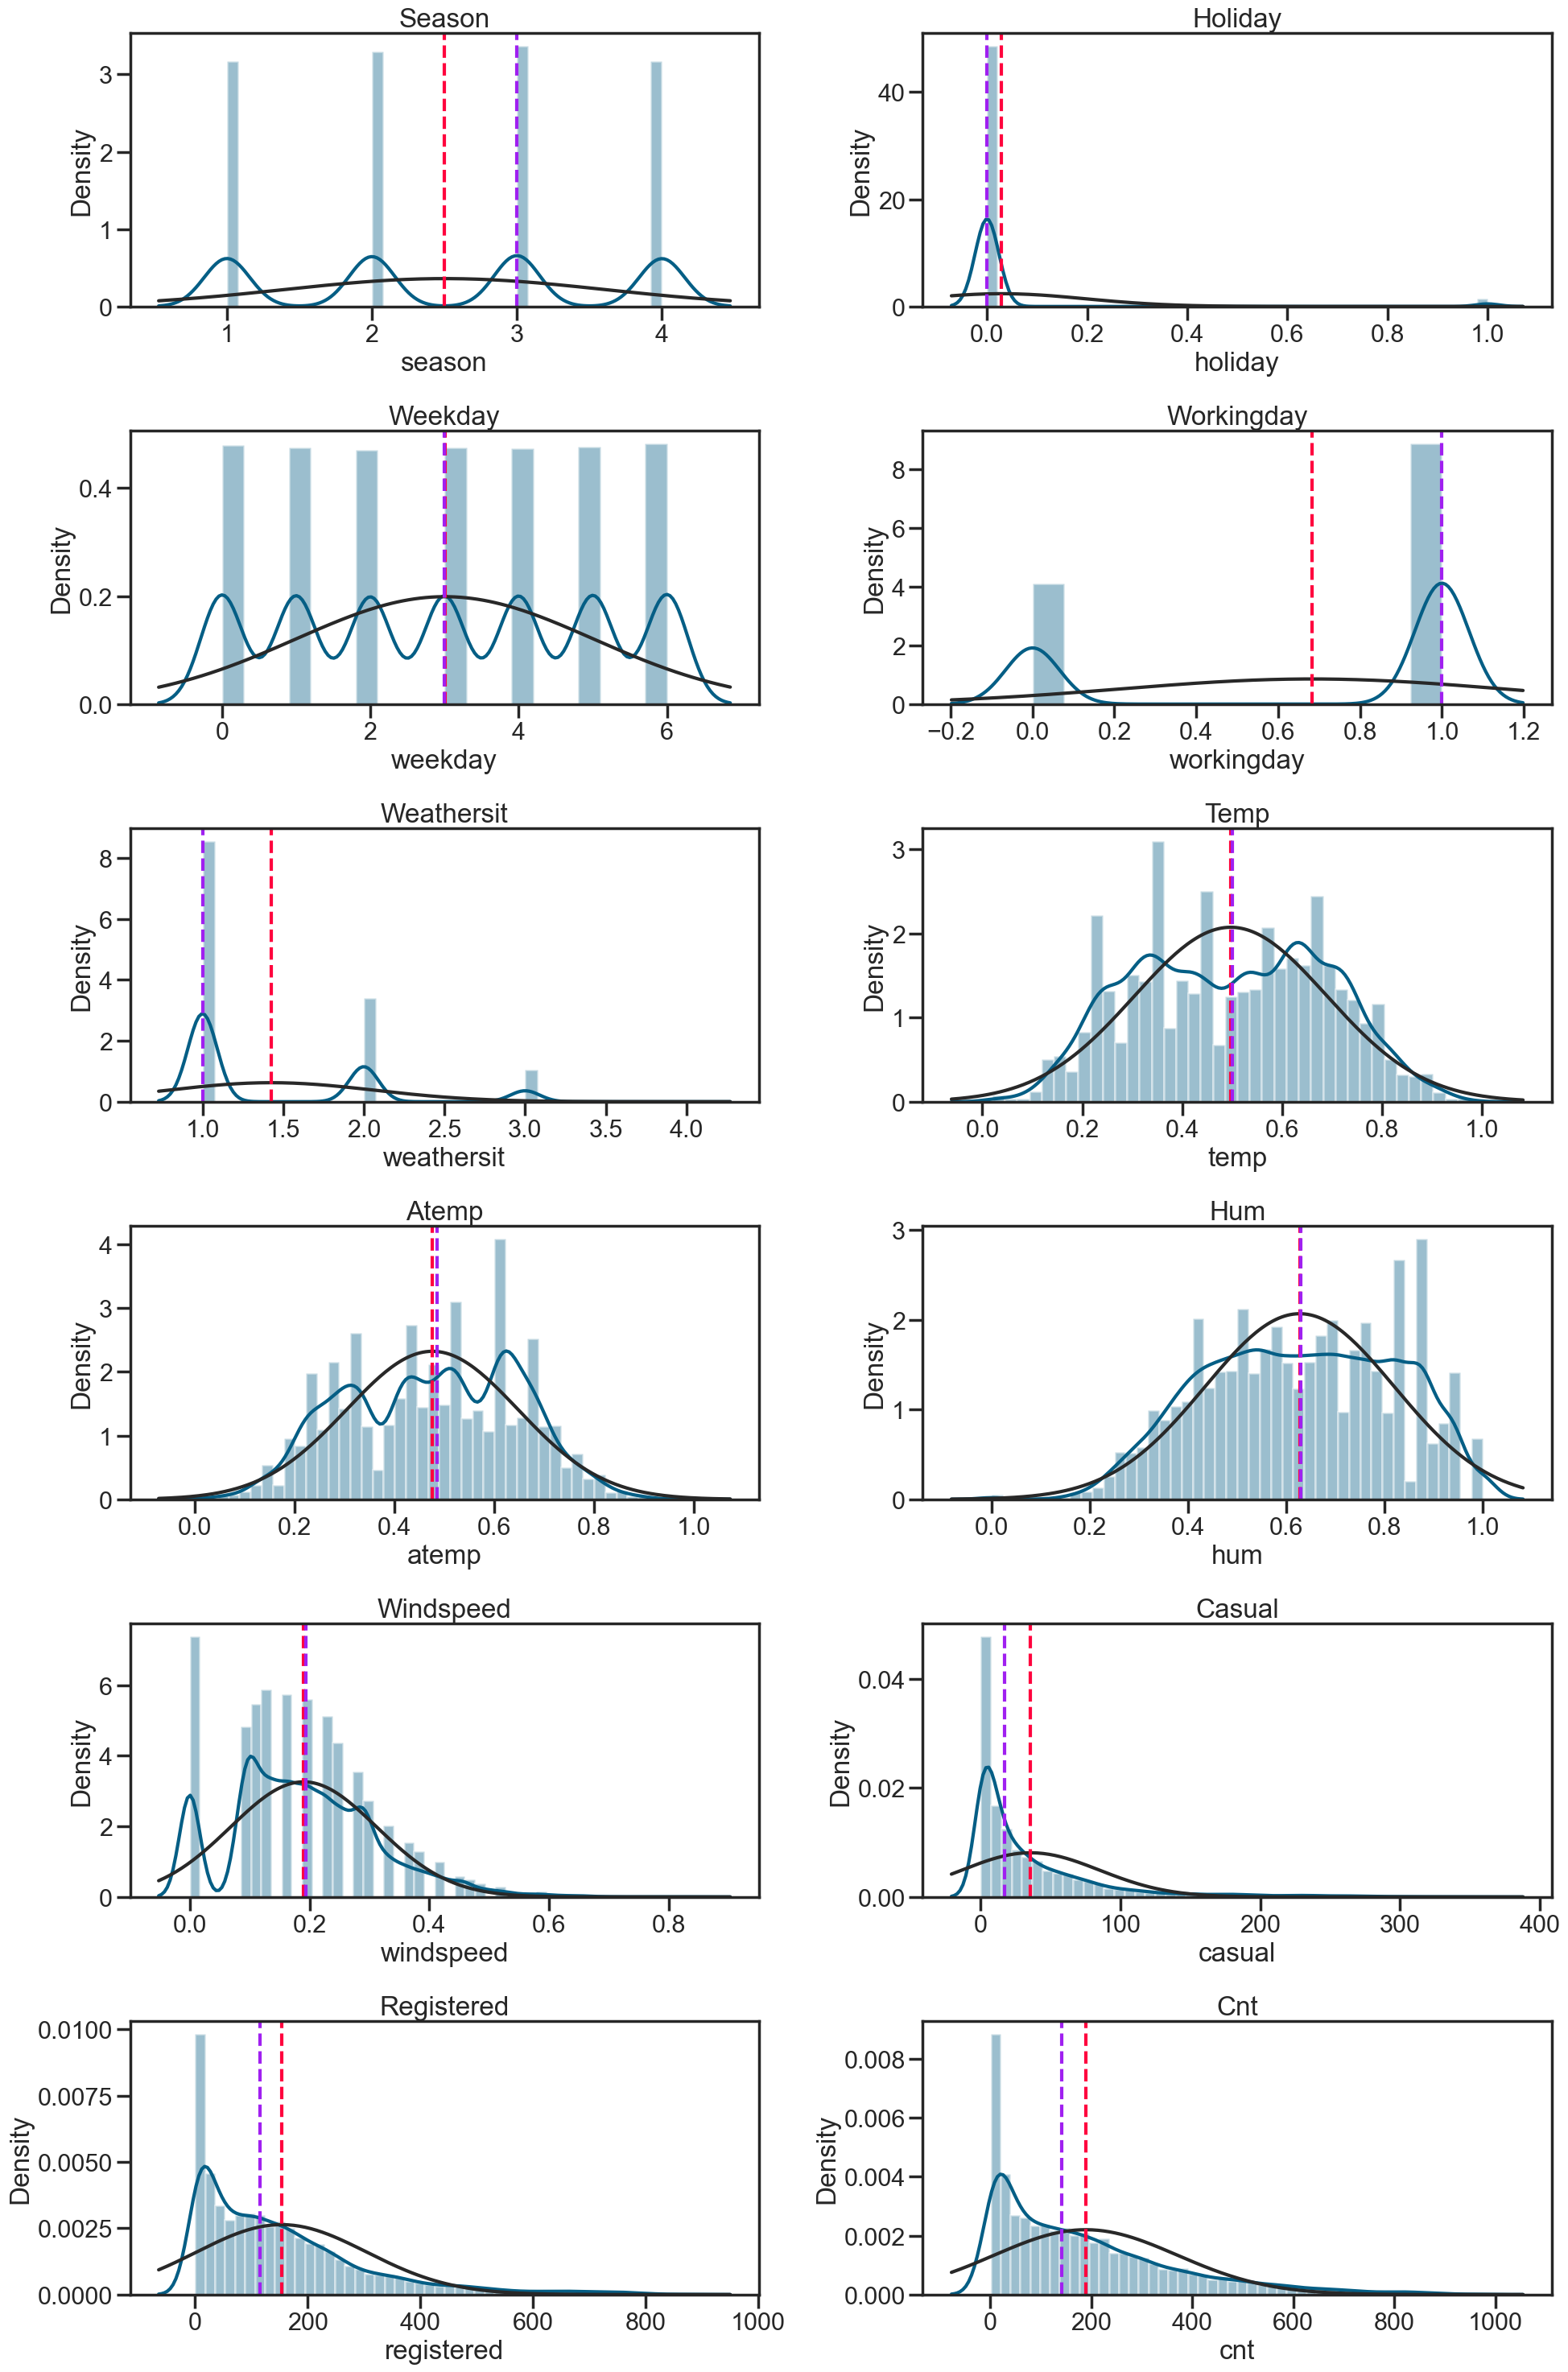

In [28]:
density_plot(visual_df,numerical_columns_of_bike)

skew = measure of asymmetry of a distribution

kurtosis = quantify shape of a distribution

In [29]:

# Assuming numerical_columns_of_bike is a list of numeric column names
numeric_columns = [col for col in visual_df.columns if pd.api.types.is_numeric_dtype(visual_df[col])]

result = visual_df[numeric_columns].agg(['skew', 'kurtosis']).T


In [30]:
result

skew   kurtosis
season     -0.005416  -1.334251
holiday     5.638538  29.796540
weekday    -0.002998  -1.255997
workingday -0.785258  -1.383529
weathersit  1.228047   0.350151
temp       -0.006021  -0.941844
atemp      -0.090429  -0.845412
hum        -0.111287  -0.826117
windspeed   0.574905   0.590820
casual      2.499237   7.571002
registered  1.557904   2.750018
cnt         1.277412   1.417203

From the above result, we can summarise that:

Right/Positive skewed distribution : Mode < Median < Mean : holiday, weathersit, windspeed, casual, registered, cnt

No skew : Mean = Median = Mode : temp, atemp, hum

Left/ negative skewed distribution : mean < Median < Mode :workingday, season, weekday

#### 2. Bivariate analysis

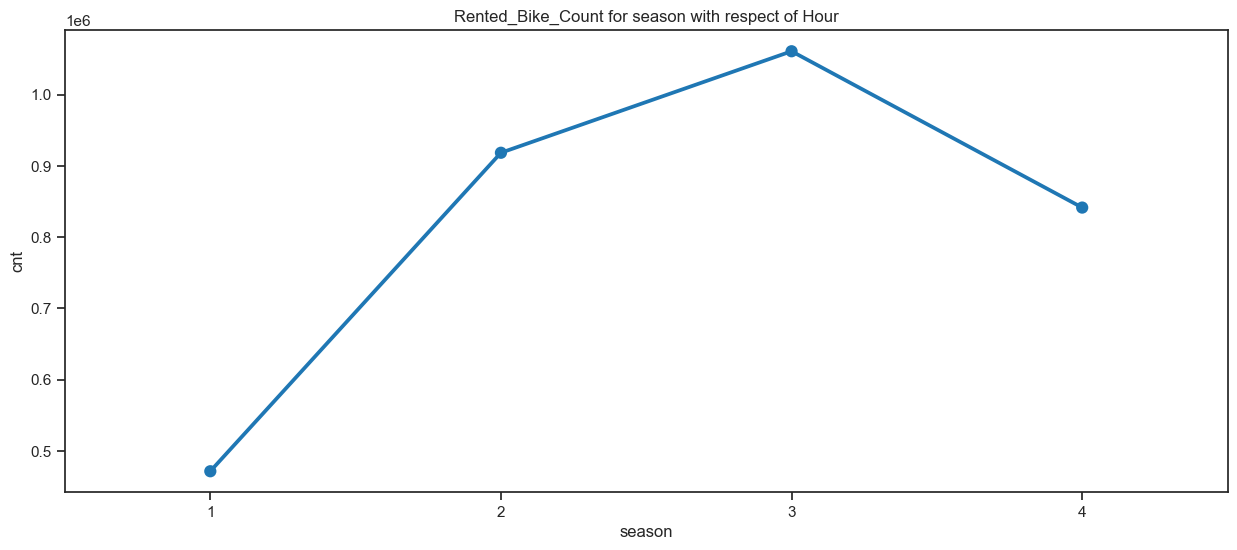

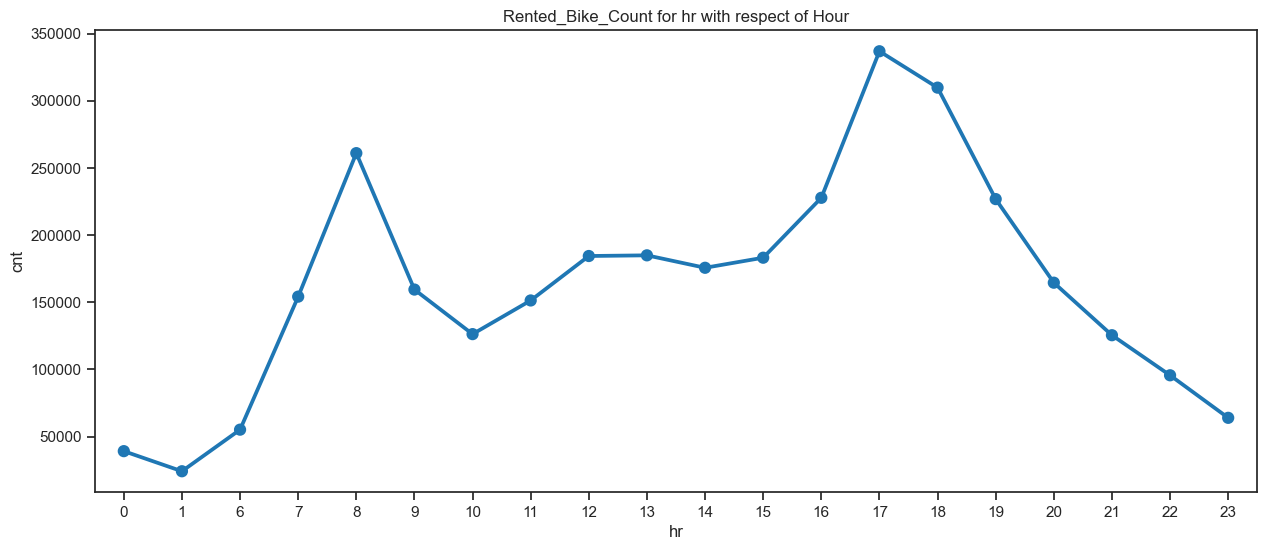

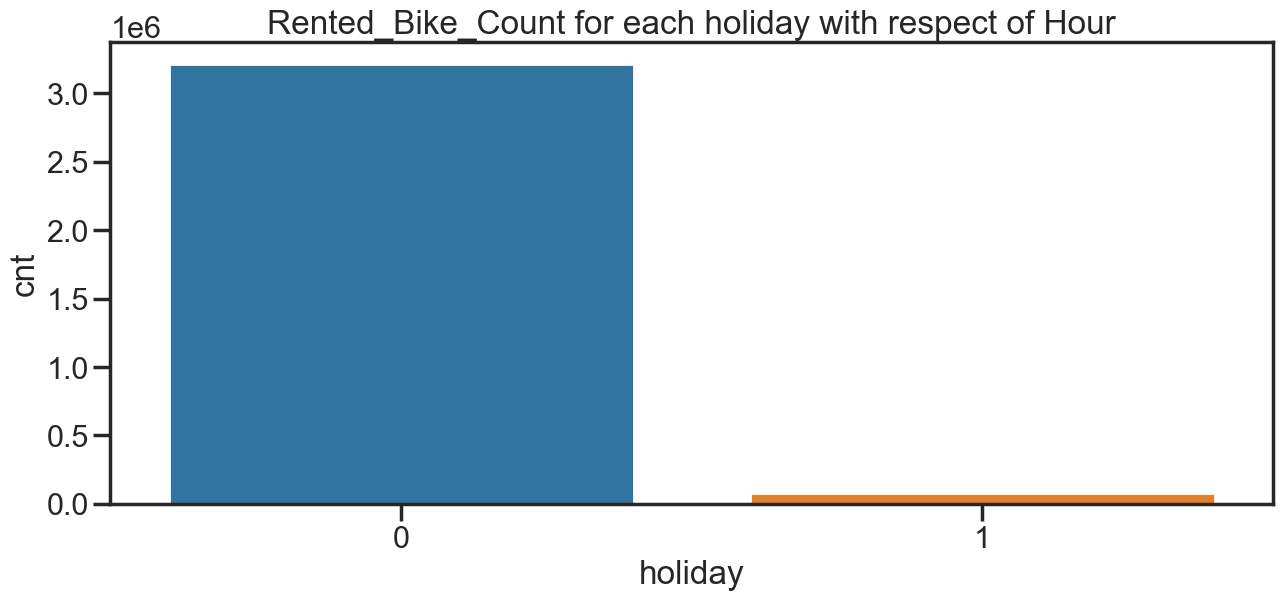

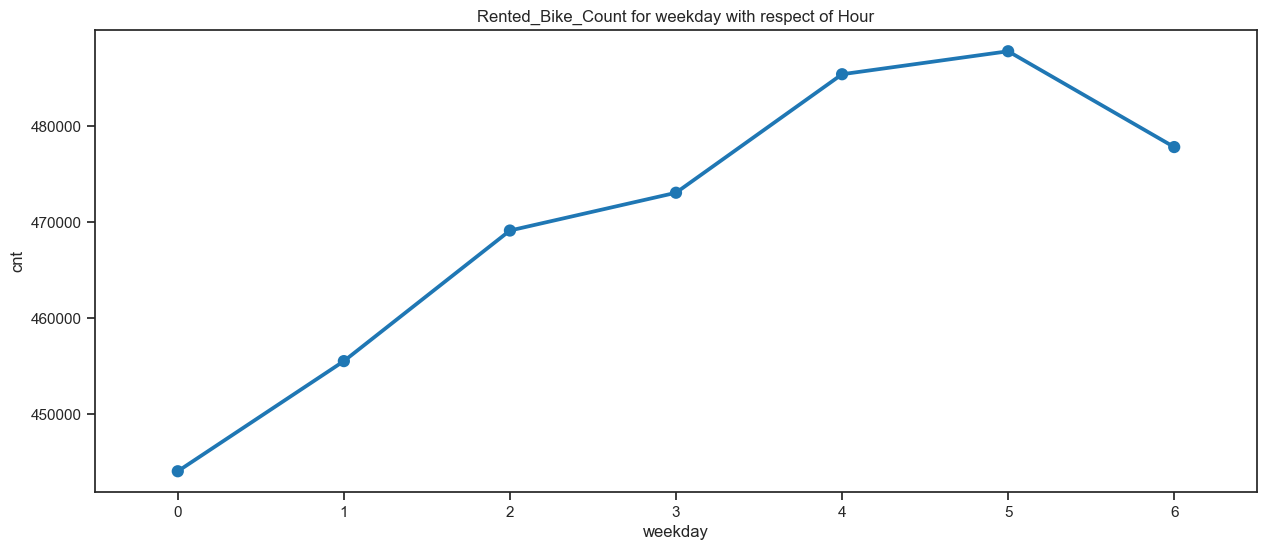

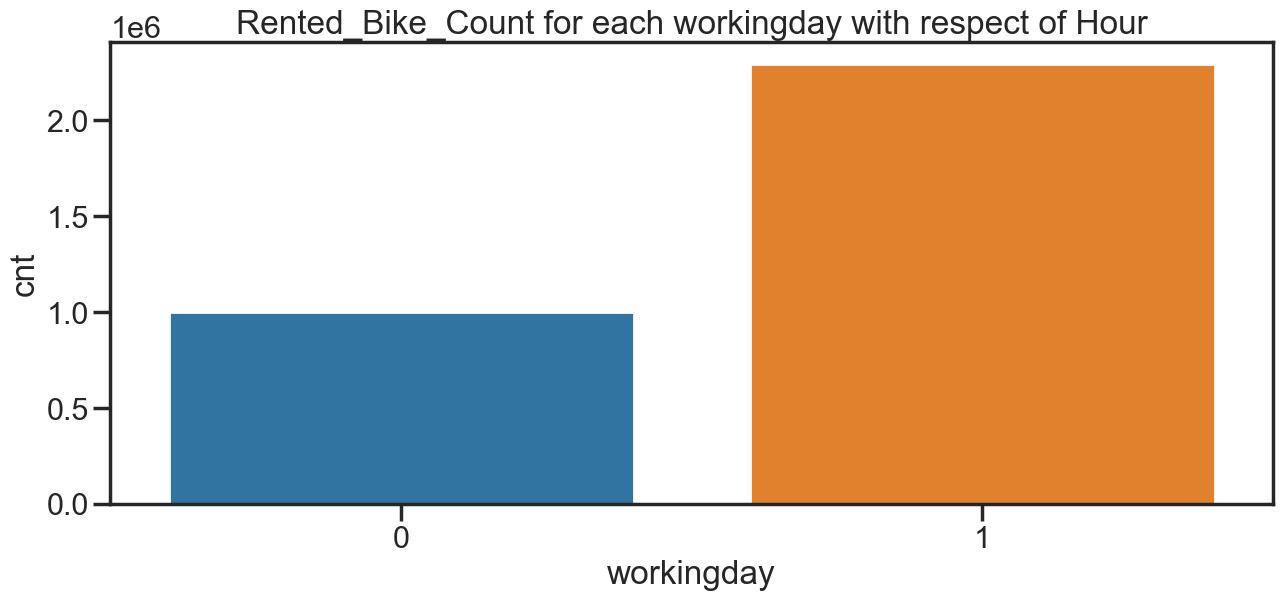

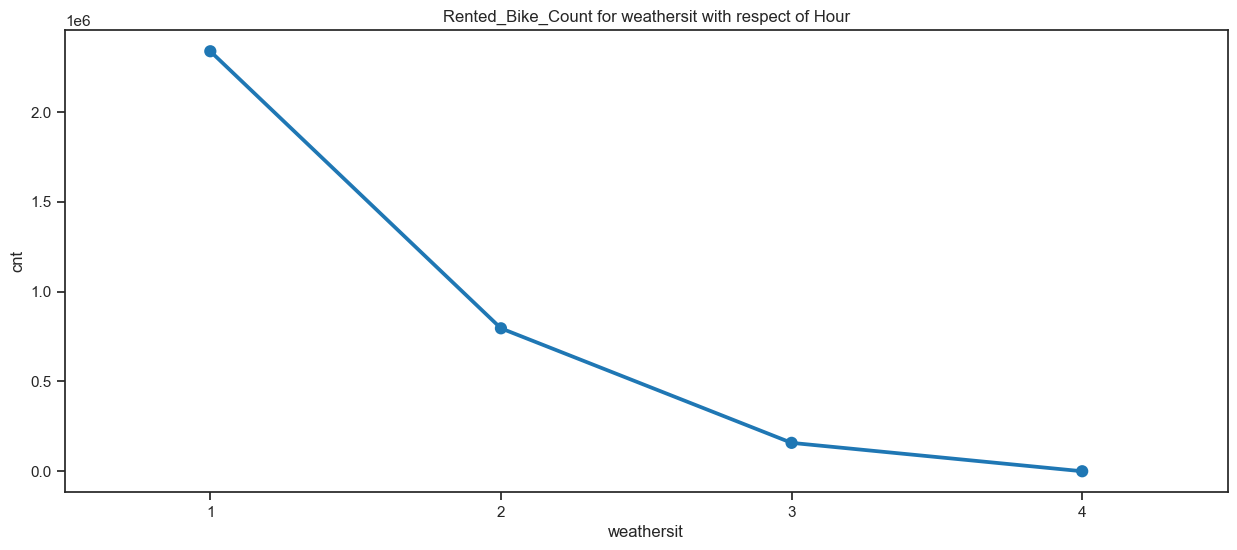

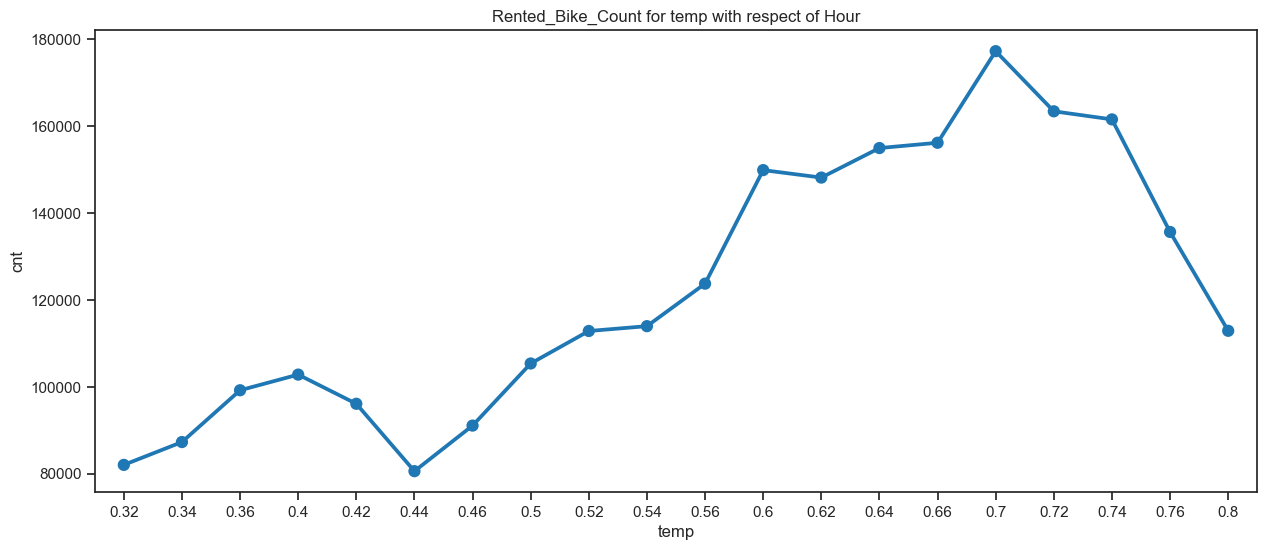

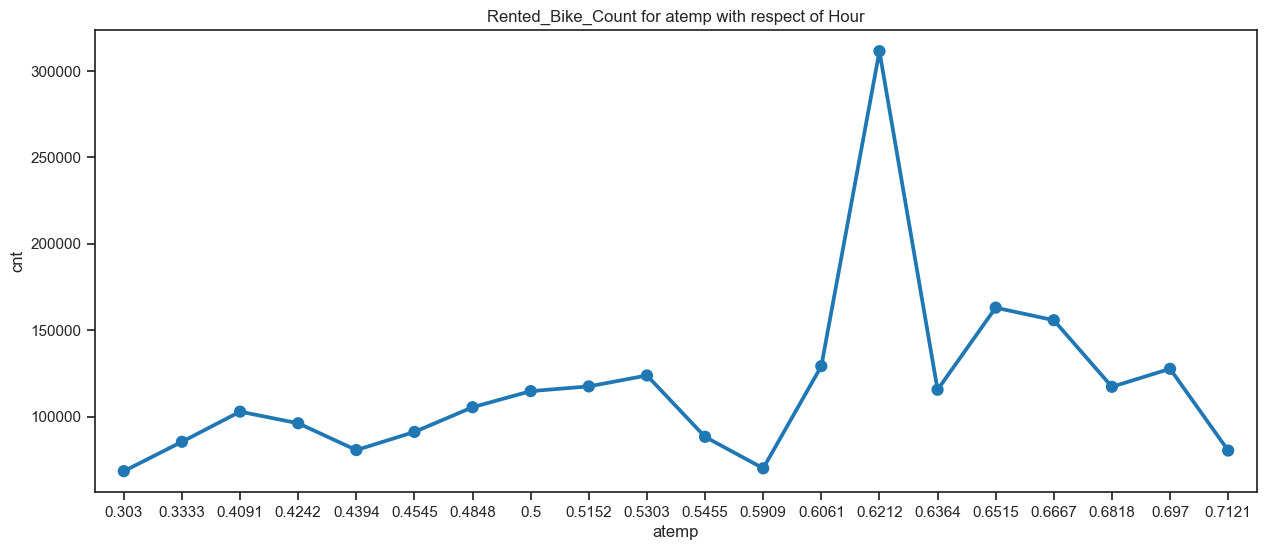

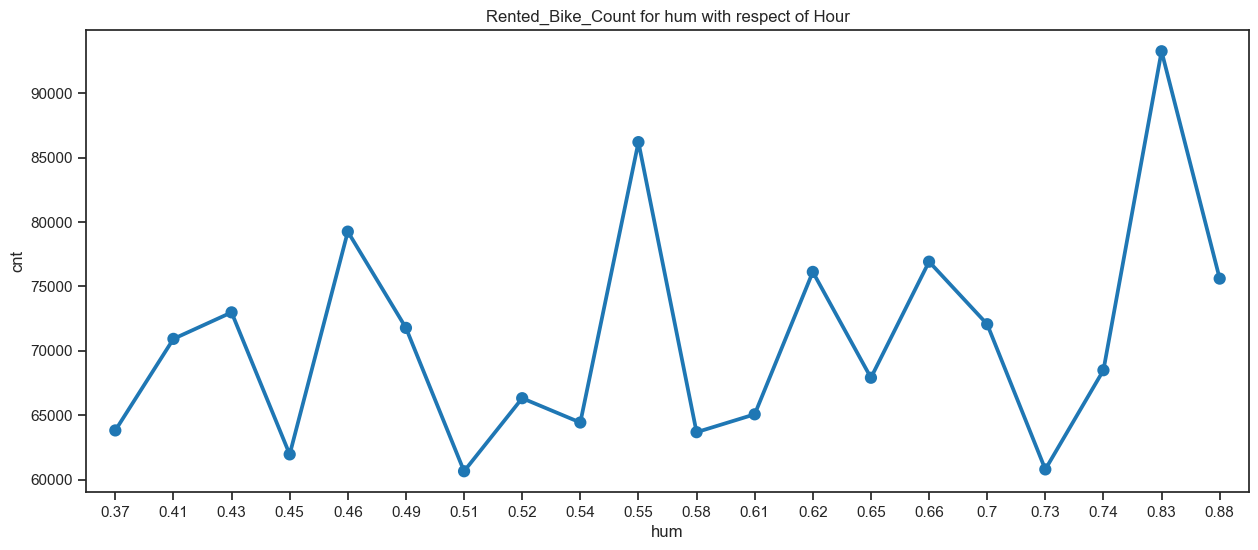

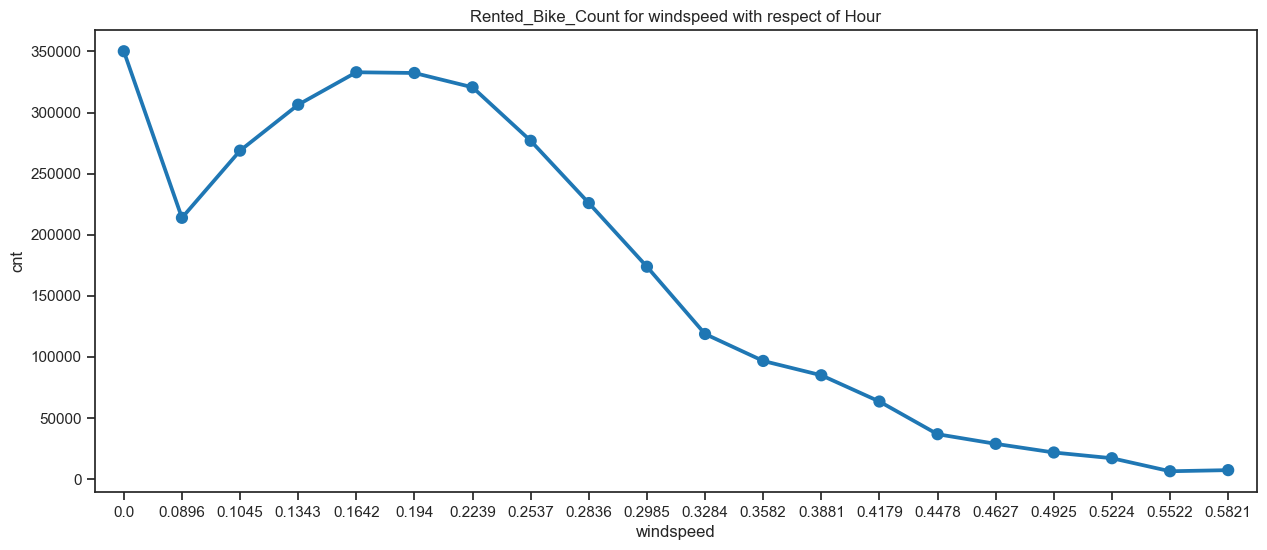

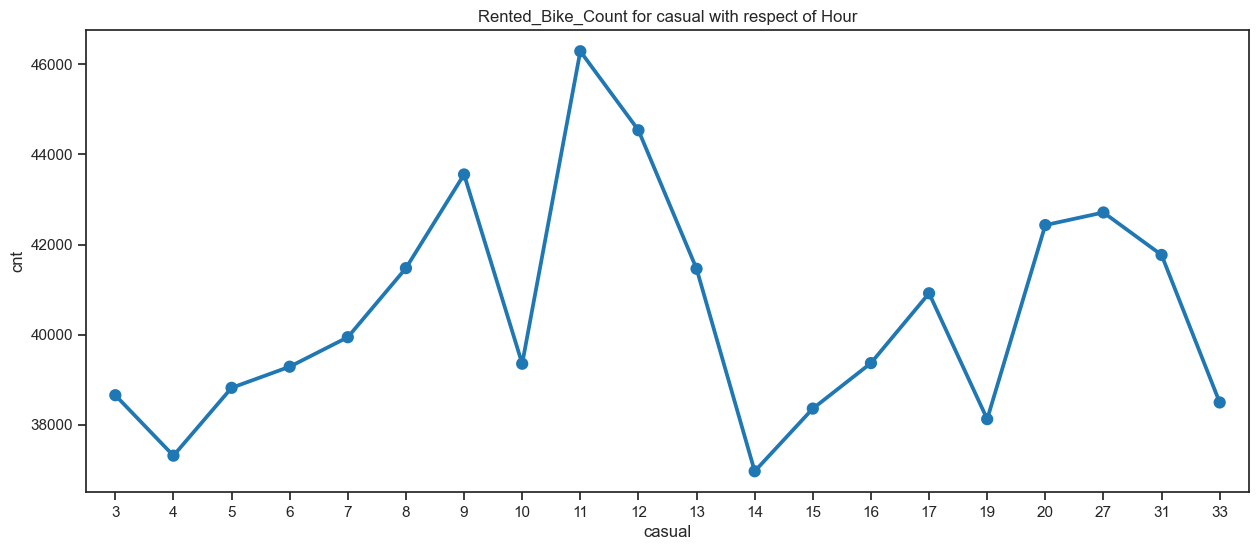

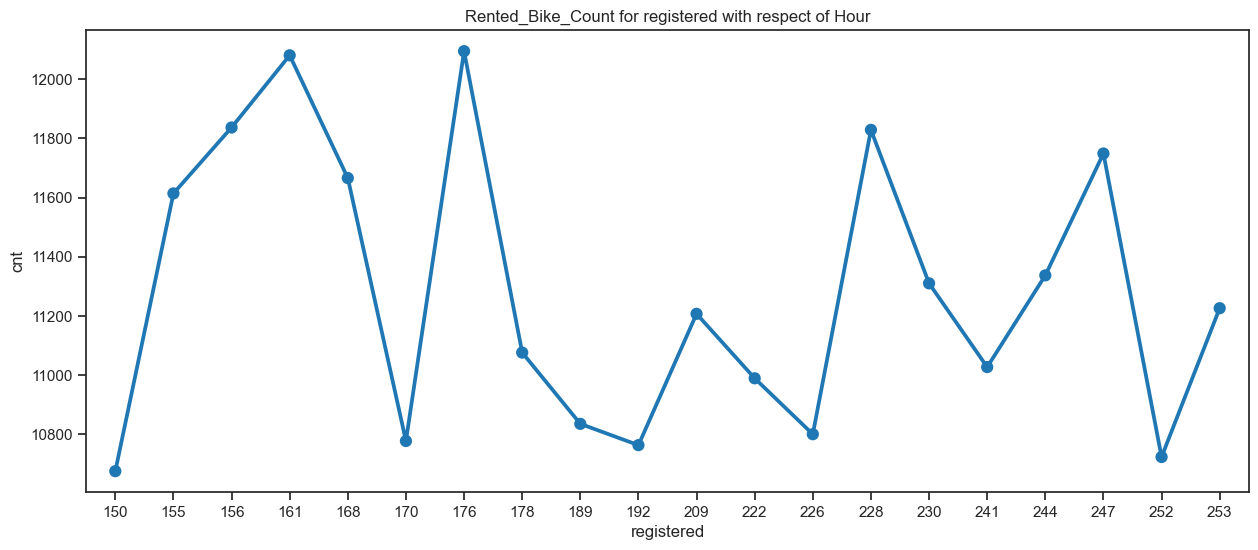

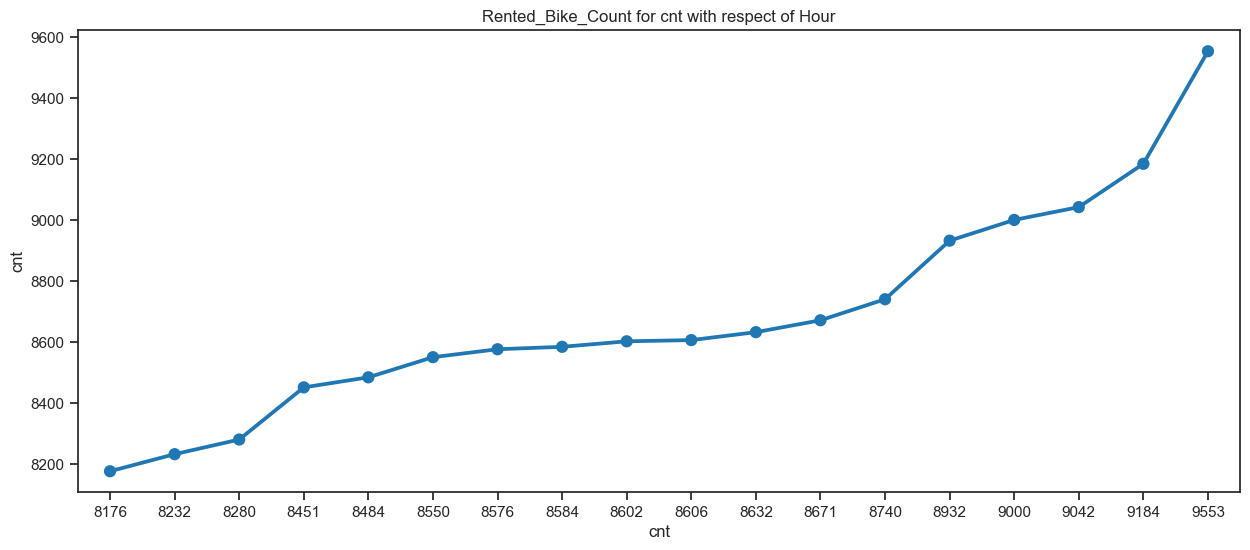

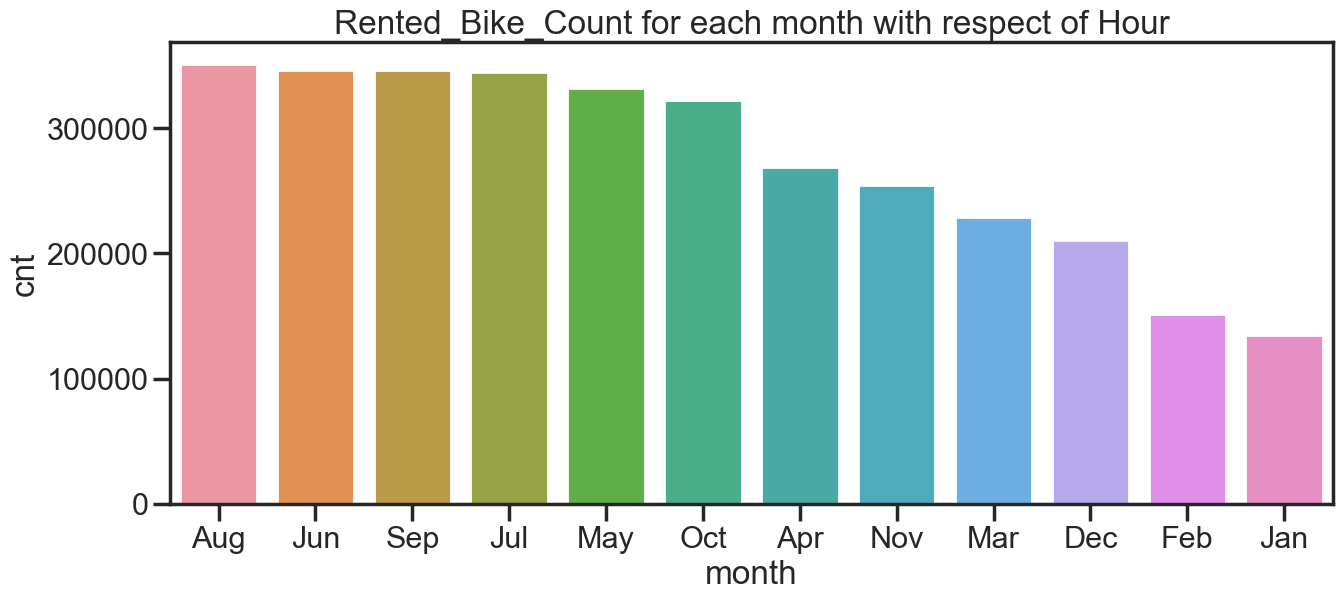

C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nikhi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


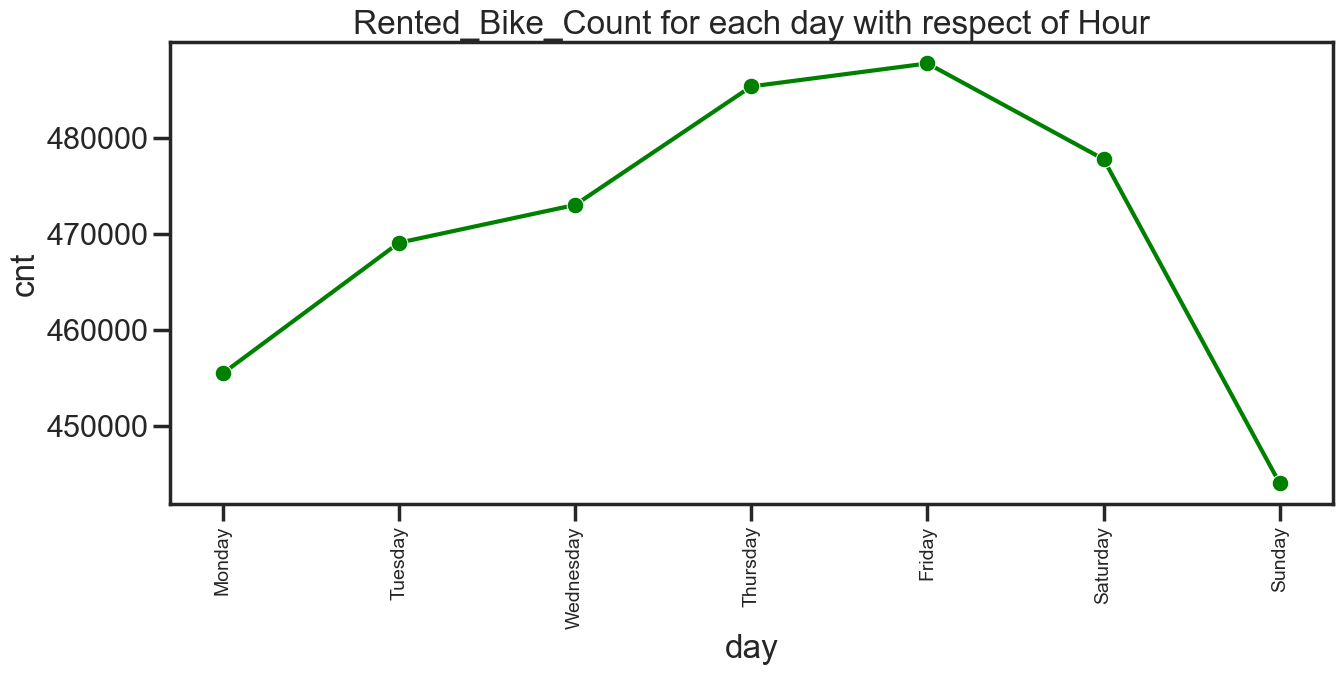

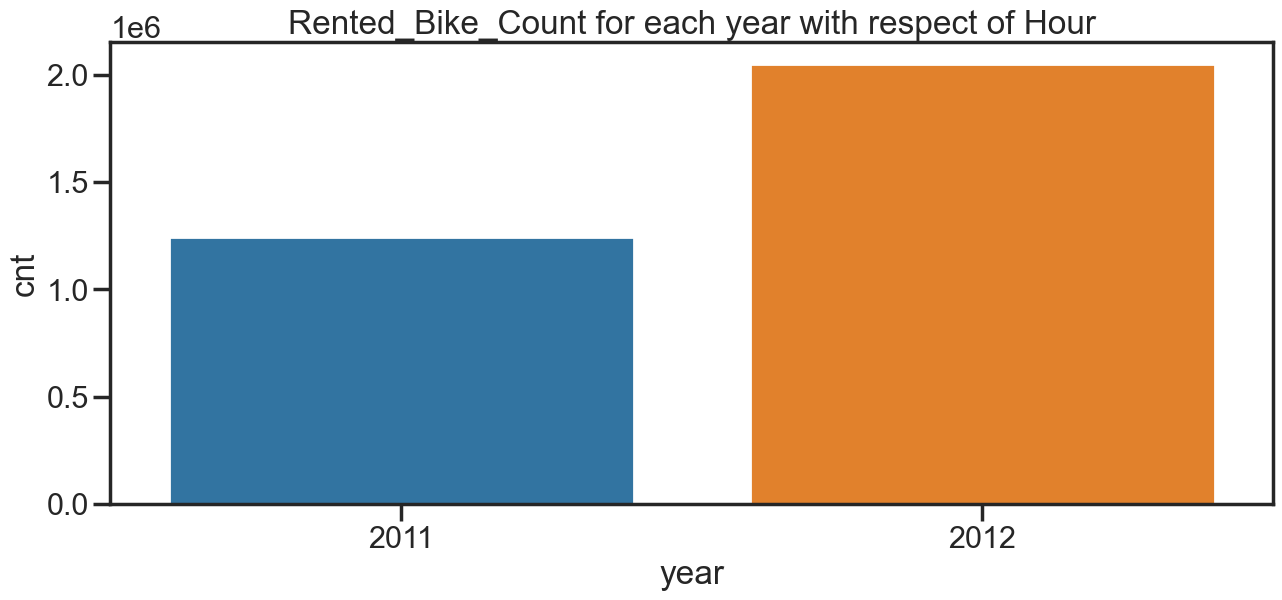

In [31]:
#comparing different feature with bike count 
for i in visual_df.columns:
  plt.figure(figsize=(15,6))
  if i == 'Rented_Bike_Count':
    pass
  elif i in ['seasons','holiday','workingday','month','year']:
    grp = visual_df.groupby([i], as_index = False)['cnt'].sum().sort_values('cnt',ascending = False)
    sns.set_context('poster');
    sns.barplot(x=grp[i], y=grp["cnt"]);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
    print('\n')
  elif i == 'day':
    workingdays = {'day':['Monday','Tuesday','Wednesday','Thursday','Friday',	'Saturday',	'Sunday']}
    workingday = pd.DataFrame(workingdays)
    grp = visual_df.groupby([i], as_index = False)['cnt'].sum().sort_values('cnt', ascending = False)
    chart = workingday.merge(grp)
    sns.set_context('poster');
    sns.lineplot(data= chart, x=chart[i],y= chart['cnt'], marker= 'o', color = 'green');
    plt.xticks(fontsize = 14, rotation = 90);
    plt.title(f"Rented_Bike_Count for each {i} with respect of Hour");
  else :
    grp = visual_df.groupby([i], as_index = False)['cnt'].sum().sort_values('cnt',
                                                                                    ascending = False).head(20)
    sns.set_context('notebook');
    sns.pointplot(x=grp[i], y=grp["cnt"]);
    plt.title(f"Rented_Bike_Count for {i} with respect of Hour");
    print('\n')

  plt.show()

In [32]:
#rented_bike_count with respect to workingday
workingday_grouped_data = visual_df.groupby('workingday')['cnt'].sum().reset_index()
workingday_grouped_data

workingday      cnt
0           0  1000269
1           1  2292410

1 - day neither weekend nor holiday (weekday), 0 - day is either weekend or holiday

In [33]:
#rented_bike_count with respect to holiday
holiday_grouped_data = visual_df.groupby('holiday')['cnt'].sum().reset_index()
holiday_grouped_data

holiday      cnt
0        0  3214244
1        1    78435

In [34]:
#rented_bike_count with respect to year
year_grouped_data = visual_df.groupby('year')['cnt'].sum().reset_index()
year_grouped_data

year      cnt
0  2011  1243103
1  2012  2049576

In [35]:
#rented_bike_count with respect to seasons
season_grouped_data = visual_df.groupby('season')['cnt'].sum().reset_index()
season_grouped_data

season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613

1 - winter, 2 - spring, 3 - summer, 4 - fall

In [36]:
#rented_bike_count with respect to weekend
# Assuming 'visual_df' is your DataFrame
weekend = visual_df.groupby('day')['cnt'].sum().reset_index()
weekend_count = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
weekend_count

day     cnt
2  Saturday  477807
3    Sunday  444027

In [37]:
#rented_bike_count with respect to weekdays
weekday = visual_df.groupby('day')['cnt'].sum().reset_index()
weekday_count = weekday[(weekday['day'] != 'Saturday') & (weekday['day'] != 'Sunday')]
weekday_count

day     cnt
0     Friday  487790
1     Monday  455503
4   Thursday  485395
5    Tuesday  469109
6  Wednesday  473048

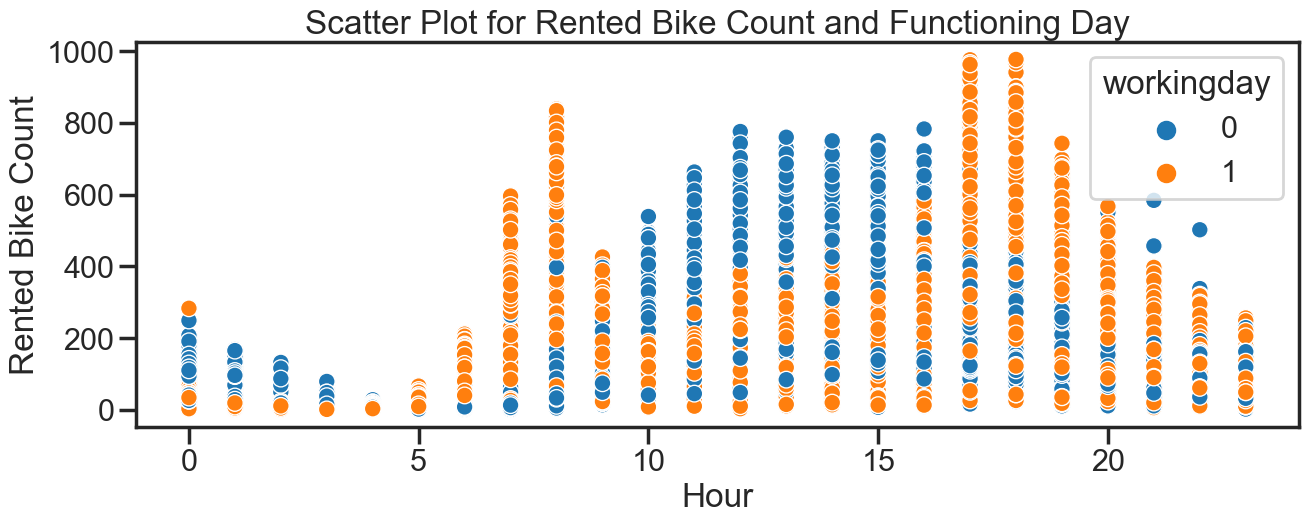

In [38]:
plt.figure(figsize=(15, 5))
sns.scatterplot(data=visual_df[['cnt', 'hr', 'workingday']], x='hr', y='cnt', hue='workingday')
plt.title('Scatter Plot for Rented Bike Count and Functioning Day')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.show()


#### 3. Multivariate analysis

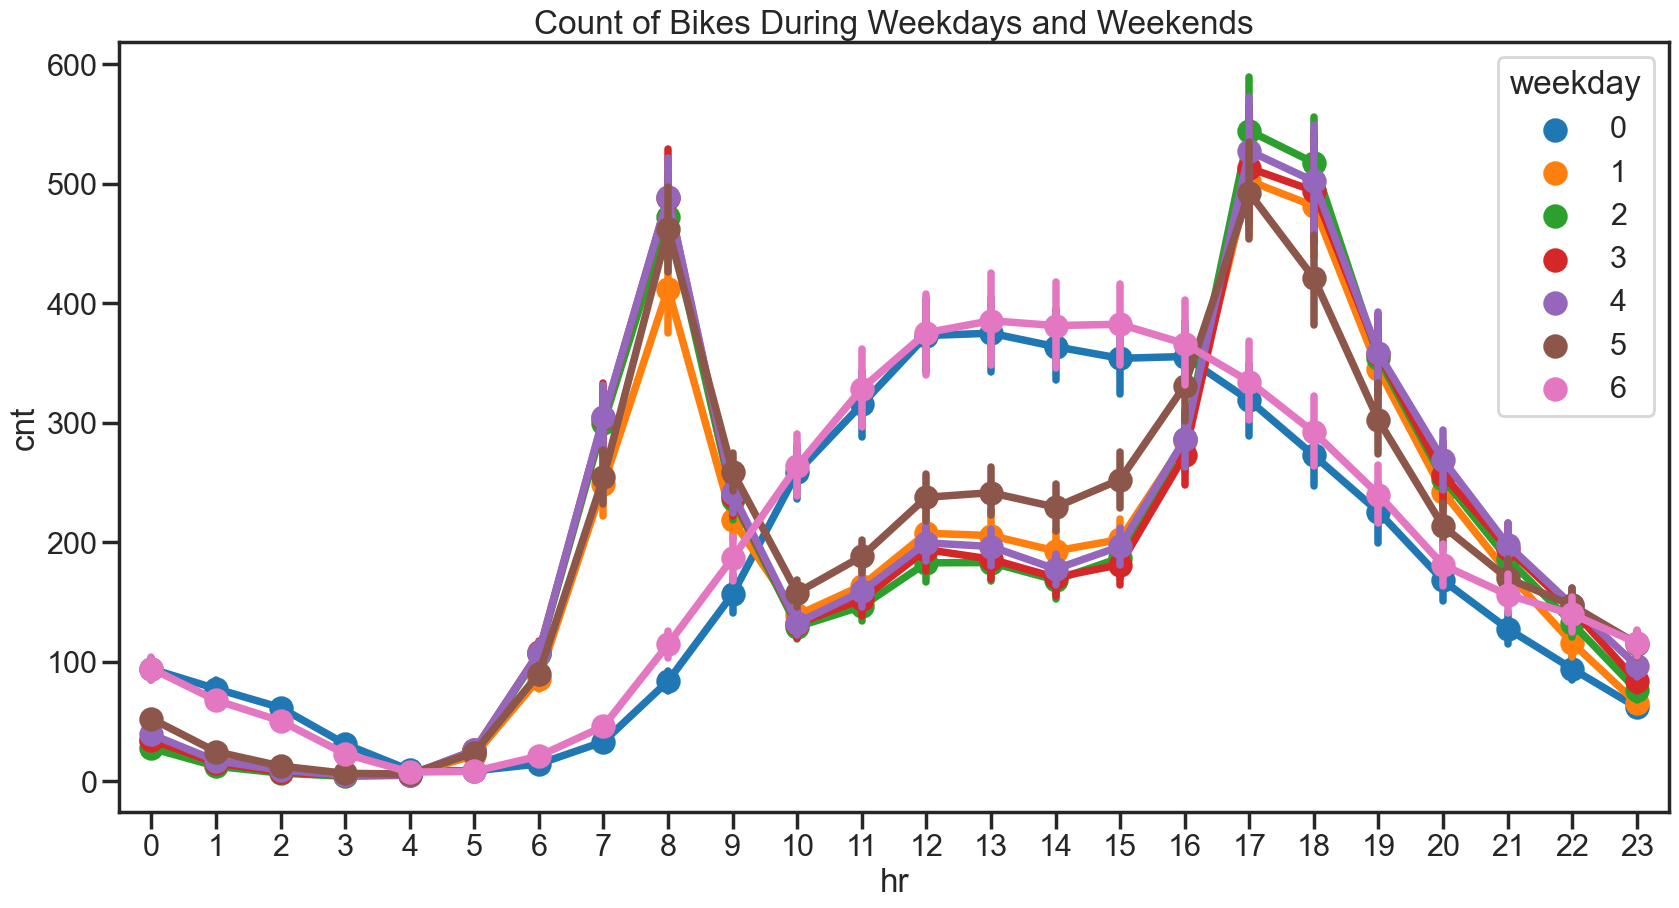

In [39]:
#rented bike counts during  weekdays and weekend
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=visual_df, x='hr', y='cnt', hue='weekday', ax=ax)
ax.set(title='Count of Bikes During Weekdays and Weekends')
plt.show()


[Text(0.5, 1.0, 'count of bikes during weekdays and weekend : unregistered users')]

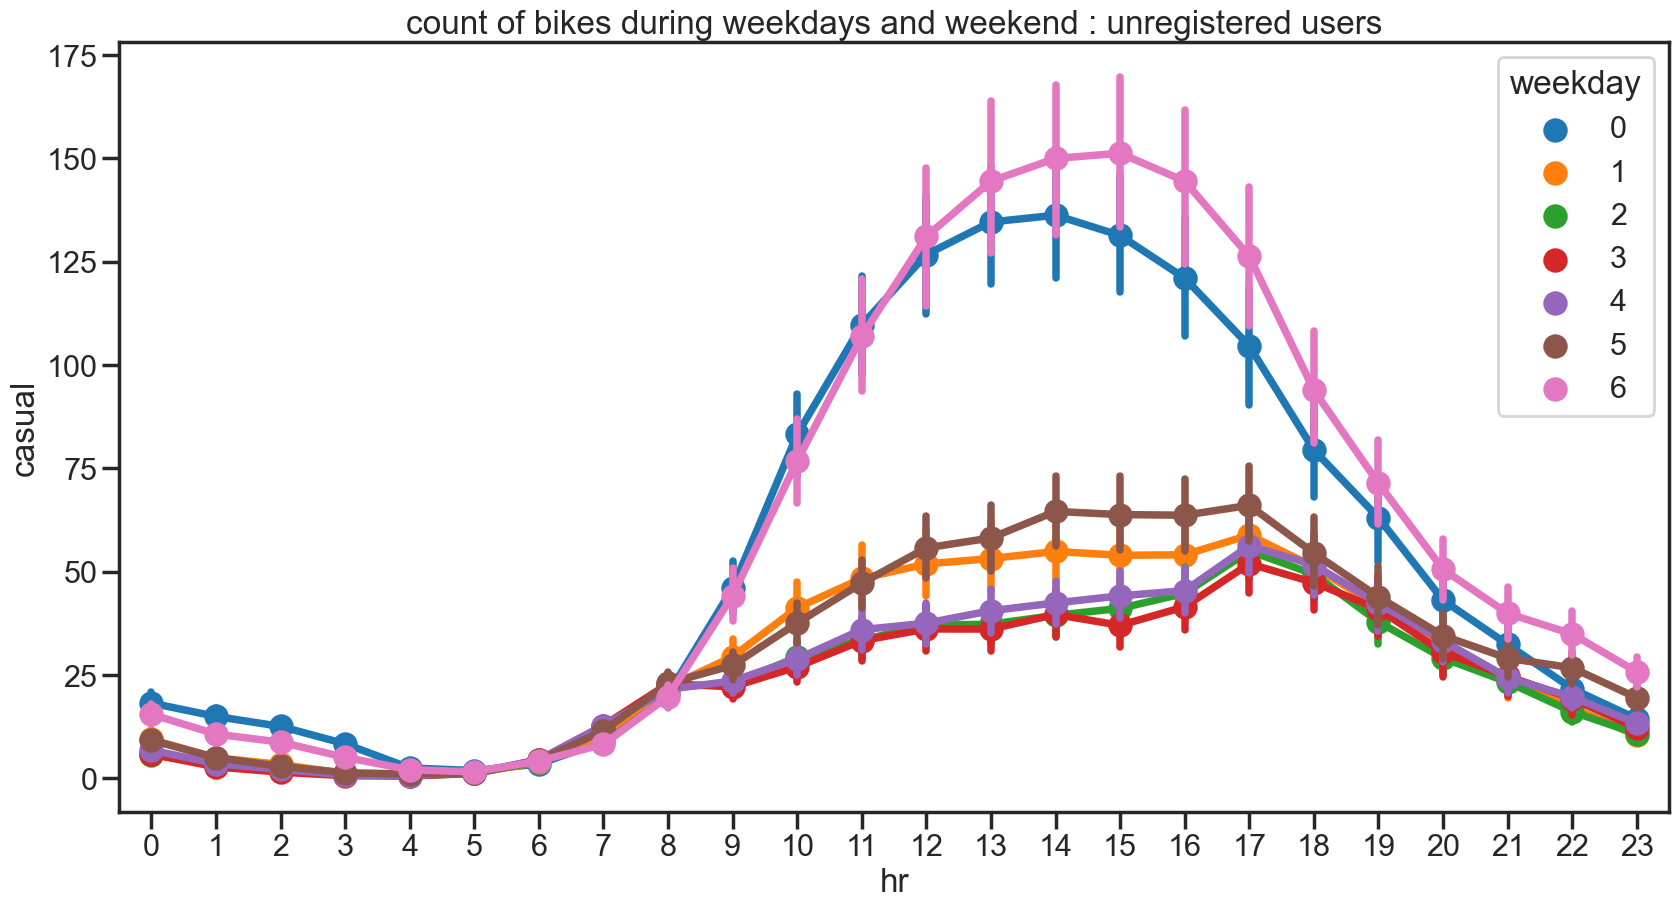

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = visual_df, x = 'hr', y= 'casual', hue = 'weekday', ax=ax)
ax.set(title = 'count of bikes during weekdays and weekend : unregistered users')

[Text(0.5, 1.0, 'count of bikes during weekdays and weekend : registered users')]

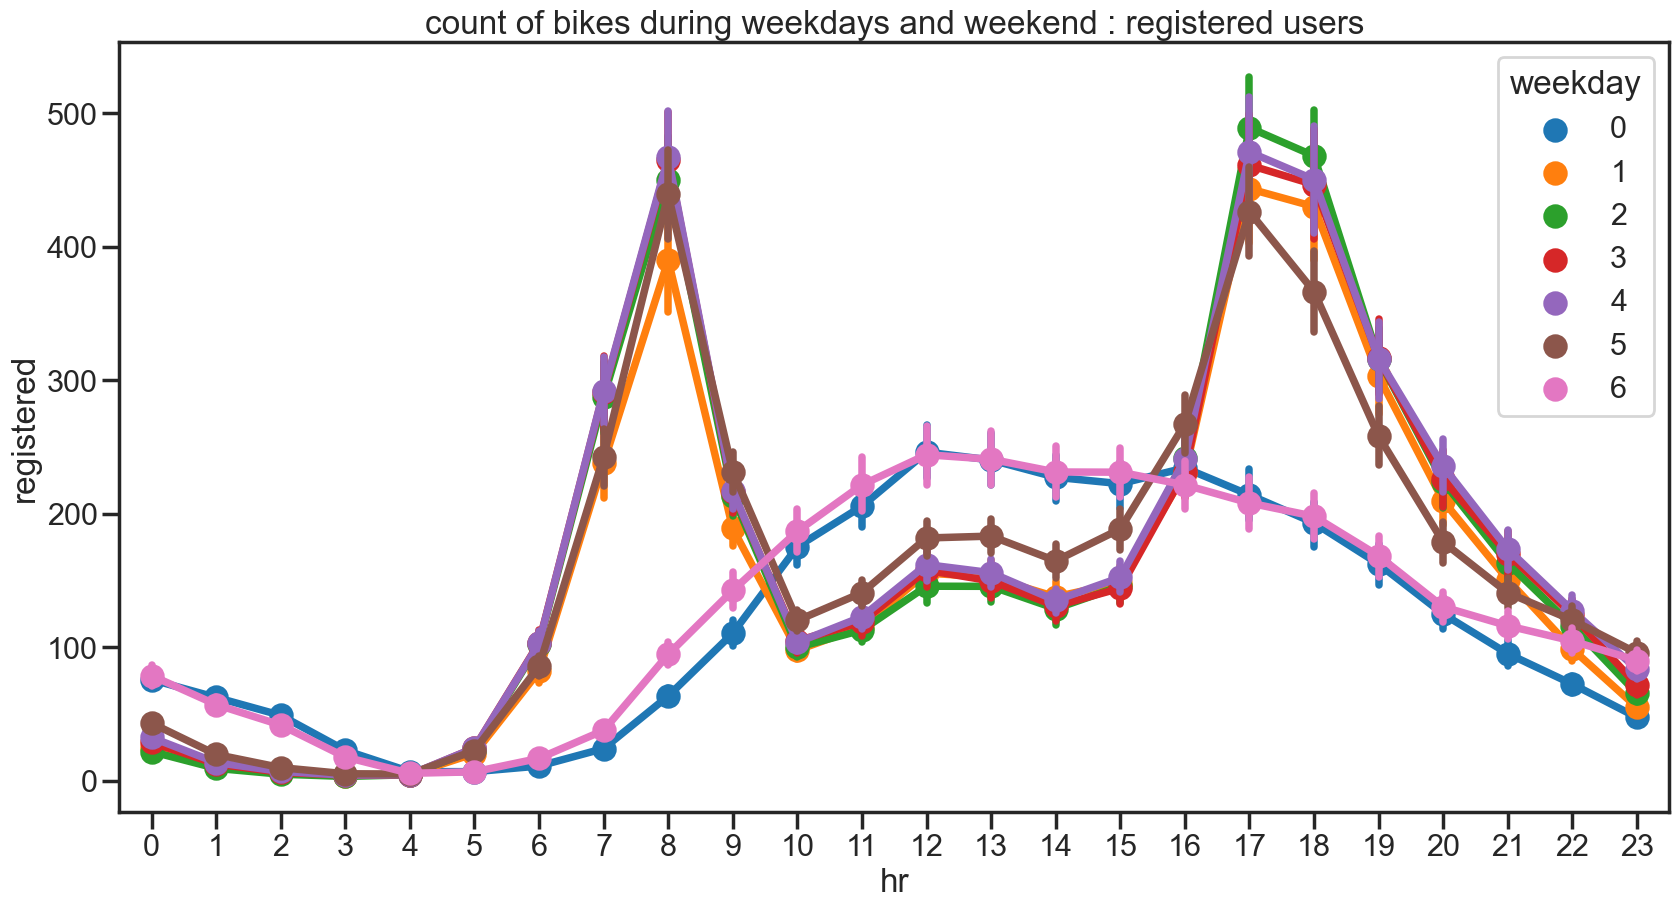

In [41]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = visual_df, x = 'hr', y= 'registered', hue = 'weekday', ax=ax)
ax.set(title = 'count of bikes during weekdays and weekend : registered users')

[Text(0.5, 1.0, 'count of bikes during different weathers')]

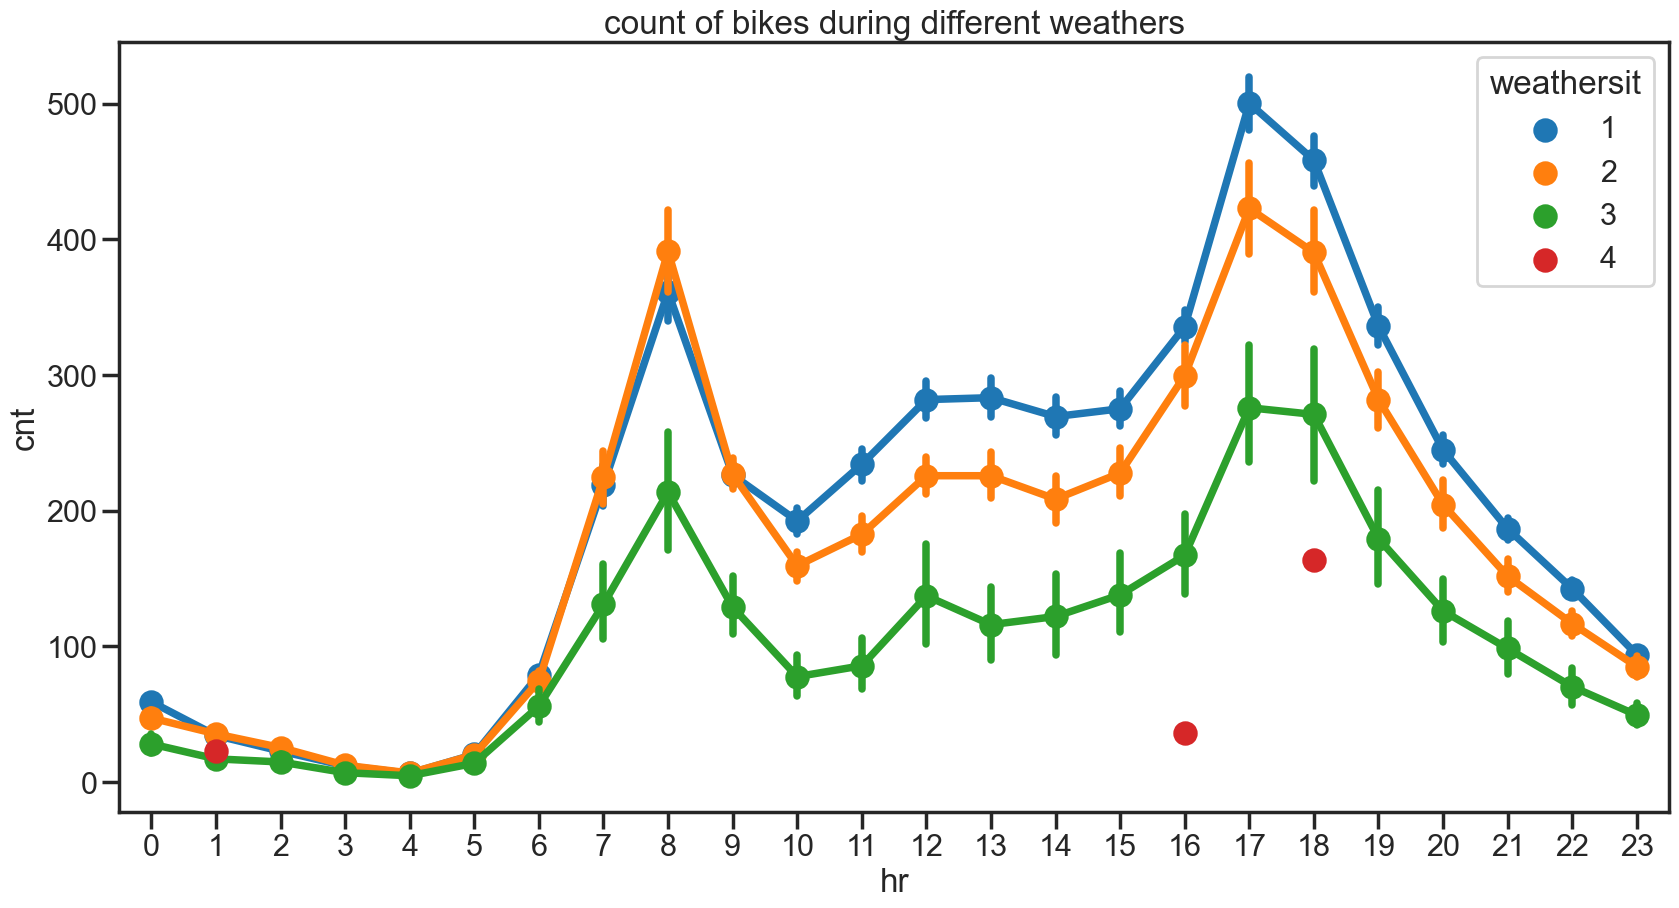

In [42]:
#count of different bikes during different weathers
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = visual_df, x = 'hr', y= 'cnt', hue = 'weathersit', ax=ax)
ax.set(title = 'count of bikes during different weathers')

 weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

[Text(0.5, 1.0, 'count of bikes during different seasons')]

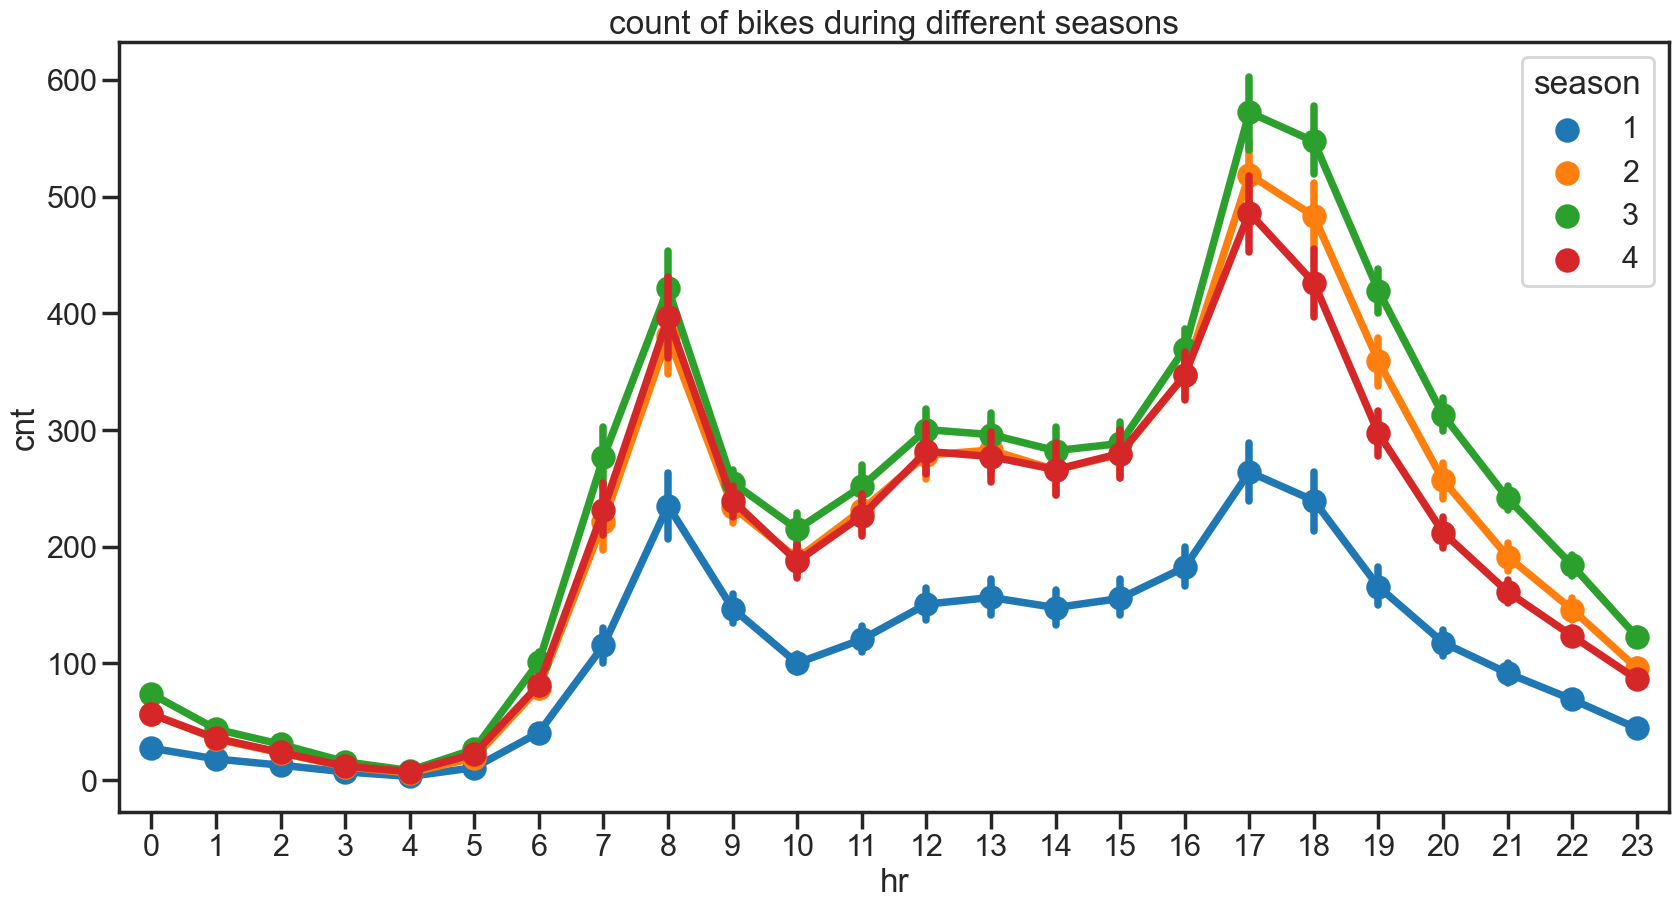

In [43]:
#count of rented bikes during diffrent seasons
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data = visual_df, x = 'hr', y= 'cnt', hue = 'season', ax=ax)
ax.set(title = 'count of bikes during different seasons')

season (1:winter, 2:spring, 3:summer, 4:fall)

### 2. To find the correlation using heatmap

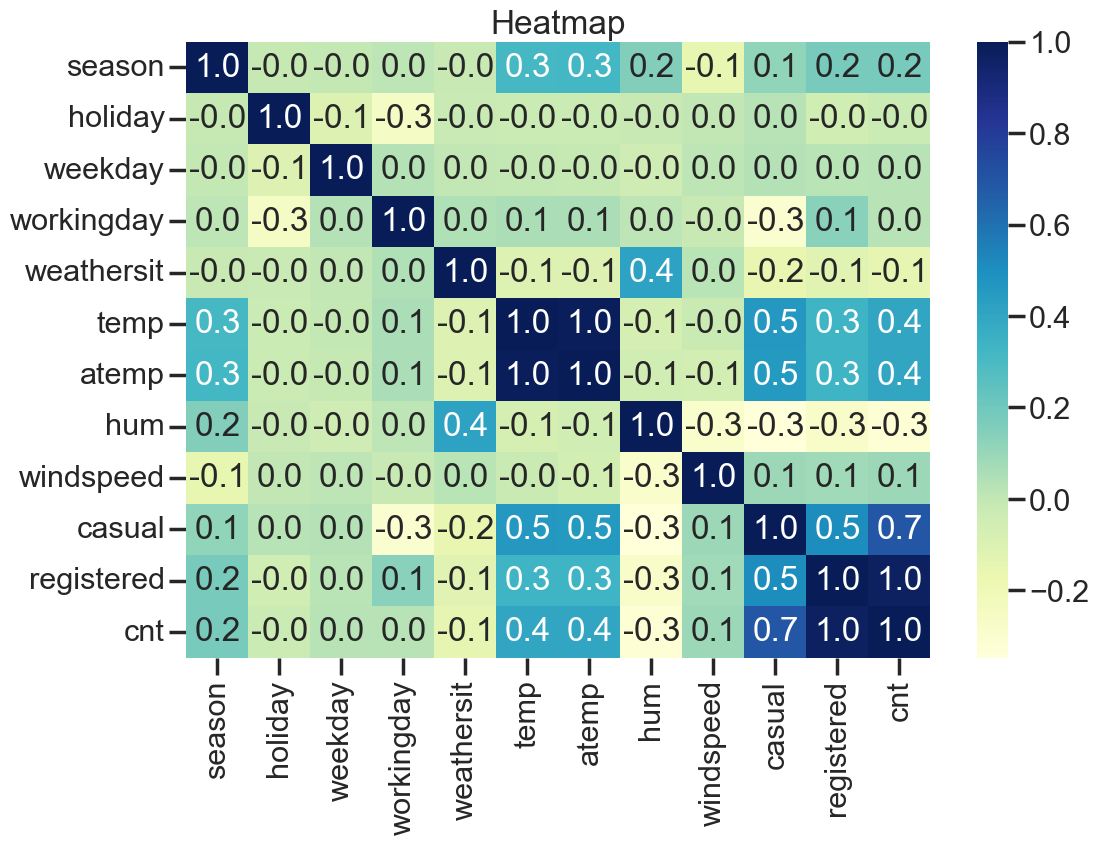

In [44]:
plt.figure(figsize=(12, 8))

# Assuming numerical_columns_of_bike is a list of numerical column names
correlation_matrix = visual_df[numerical_columns_of_bike].corr()

dataplot = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt='.1f') 
plt.title('Heatmap')
plt.show()


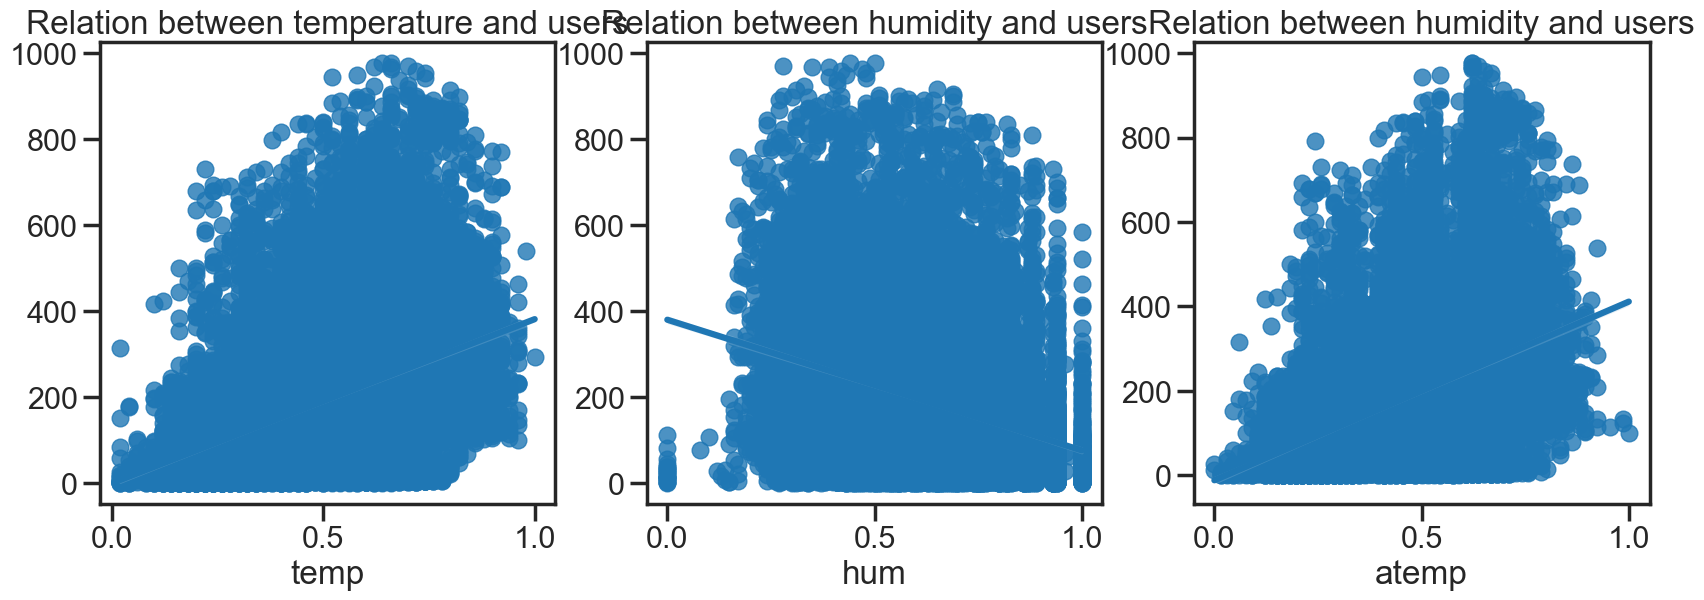

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 6))

# First subplot
sns.regplot(x=visual_df['temp'], y=visual_df['cnt'].values, ax=ax1)
ax1.set(title="Relation between temperature and users")

# Second subplot
sns.regplot(x=visual_df['hum'], y=visual_df['cnt'].values, ax=ax2)
ax2.set(title="Relation between humidity and users")

# Third subplot
sns.regplot(x=visual_df['atemp'], y=visual_df['cnt'].values, ax=ax3)
ax3.set(title="Relation between humidity and users")

plt.show()


### 3. To Detect The outliers

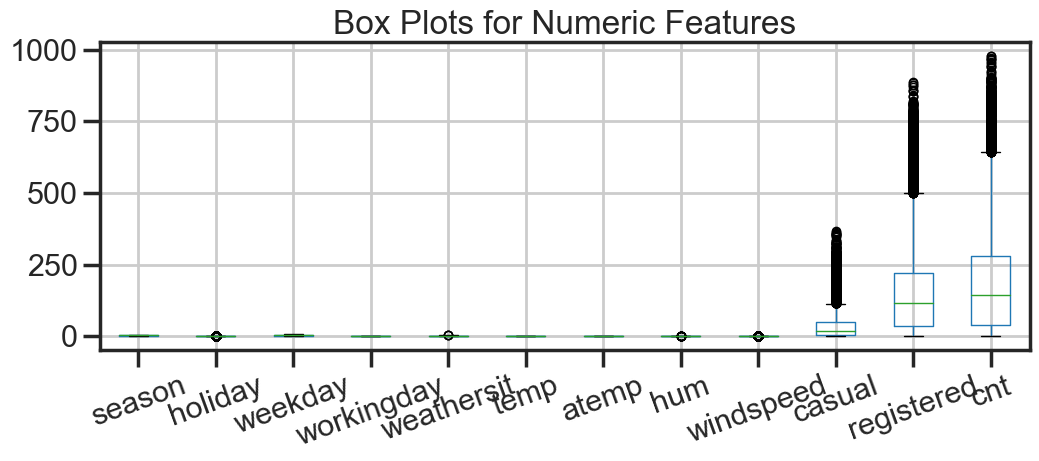

In [46]:
# Convert the list of numerical column into a DataFrame
numeric_columns_df = visual_df[numerical_columns_of_bike]

plt.figure(figsize=(12, 4))
# detecting the outlier of all the numerical column using boxplot 
numeric_columns_df.boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

## Data Preprocessing

### Handling Outliers

In [47]:
z_scores = np.abs(zscore(visual_df[numerical_columns_of_bike]))
threshold = 3
visual_df = visual_df[(z_scores < threshold).all(axis=1)]

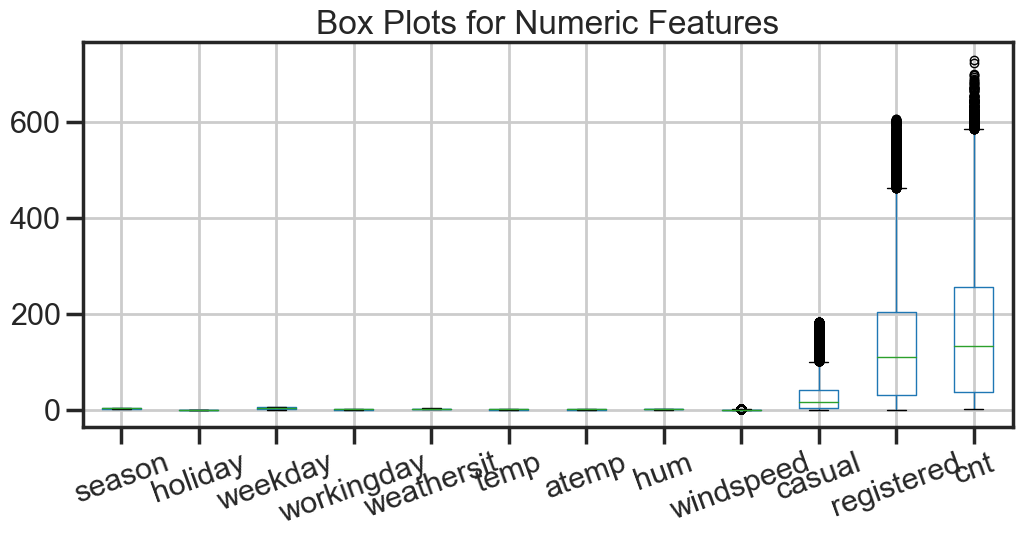

In [48]:
plt.figure(figsize=(12, 5))
# detecting the outlier of all the numerical column using boxplot 
visual_df[numerical_columns_of_bike].boxplot()
plt.title("Box Plots for Numeric Features")
plt.xticks(rotation=20)
plt.show()

Ignoring outliers in casual and registered as the cnt is the sum of registered and casual, since if treated will cause entire value to be distributed as 0

cnt which is the target variable, shows positive skewness, therefore will try to use transformation to get the better result

### Categorical Encoding (Label Encoder)

In [49]:
visual_df

season  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
0           1   0        0        6           0           1  0.24  0.2879   
1           1   1        0        6           0           1  0.22  0.2727   
2           1   2        0        6           0           1  0.22  0.2727   
3           1   3        0        6           0           1  0.24  0.2879   
4           1   4        0        6           0           1  0.24  0.2879   
...       ...  ..      ...      ...         ...         ...   ...     ...   
17374       1  19        0        1           1           2  0.26  0.2576   
17375       1  20        0        1           1           2  0.26  0.2576   
17376       1  21        0        1           1           1  0.26  0.2576   
17377       1  22        0        1           1           1  0.26  0.2727   
17378       1  23        0        1           1           1  0.26  0.2727   

        hum  windspeed  casual  registered  cnt month       day  year  
0      0.81     0.0000       3          13   16   Jan  Saturday  2011  
1      0.80     0.0000       8          32   40   Jan  Saturday  2011  
2      0.80     0.0000       5          27   32   Jan  Saturday  2011  
3      0.75     0.0000       3          10   13   Jan  Saturday  2011  
4      0.75     0.0000       0           1    1   Jan  Saturday  2011  
...     ...        ...     ...         ...  ...   ...       ...   ...  
17374  0.60     0.1642      11         108  119   Dec    Monday  2012  
17375  0.60     0.1642       8          81   89   Dec    Monday  2012  
17376  0.60     0.1642       7          83   90   Dec    Monday  2012  
17377  0.56     0.1343      13          48   61   Dec    Monday  2012  
17378  0.65     0.1343      12          37   49   Dec    Monday  2012  

[15934 rows x 16 columns]

In [50]:

# Assuming 'column_name' is the object column with string representations of numbers
visual_df['hr'] = visual_df['hr'].astype(int)




In [51]:
#since day is categorised as working day and weekend, dropping day column along with dew point
visual_df = visual_df.drop(columns=['day'], axis = 1)

visual_df = visual_df.drop(columns =['year'], axis = 1)


In [52]:
num = visual_df.select_dtypes(exclude ='object')
cat = visual_df.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['season', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
 categorial : ['month']


In [53]:
#applying label encoder
encoded_df = visual_df.apply(LabelEncoder().fit_transform)
encoded_df.head(10)

season  hr  holiday  weekday  workingday  weathersit  temp  atemp  hum  \
0       0   0        0        6           0           0    11     19   71   
1       0   1        0        6           0           0    10     18   70   
2       0   2        0        6           0           0    10     18   70   
3       0   3        0        6           0           0    11     19   65   
4       0   4        0        6           0           0    11     19   65   
5       0   5        0        6           0           1    11     17   65   
6       0   6        0        6           0           0    10     18   70   
7       0   7        0        6           0           0     9     17   76   
8       0   8        0        6           0           0    11     19   65   
9       0   9        0        6           0           0    15     23   66   

   windspeed  casual  registered  cnt  month  
0          0       3          13   15      4  
1          0       8          32   39      4  
2          0       5          27   31      4  
3          0       3          10   12      4  
4          0       0           1    0      4  
5          1       0           1    0      4  
6          0       2           0    1      4  
7          0       1           2    2      4  
8          0       1           7    7      4  
9          0       8           6   13      4

In [54]:
encoded_df.dtypes

season        int64
hr            int64
holiday       int64
weekday       int64
workingday    int64
weathersit    int64
temp          int64
atemp         int64
hum           int64
windspeed     int64
casual        int64
registered    int64
cnt           int64
month         int32
dtype: object

In [55]:
X= encoded_df.drop(['cnt'], axis=1)
Y= encoded_df['cnt']

In [56]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Transformation

In [57]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(scaled_features_train, columns=X_train.columns, index=X_train.index)
scaler = MinMaxScaler()
scaled_features_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(scaled_features_test, columns=X_test.columns, index=X_test.index)


In [58]:
X_train

season        hr  holiday   weekday  workingday  weathersit  \
7000   1.000000  0.304348      0.0  0.166667         1.0         0.5   
1764   0.000000  0.217391      0.0  1.000000         0.0         0.0   
8137   1.000000  0.739130      0.0  1.000000         0.0         0.0   
7485   1.000000  0.521739      0.0  0.000000         0.0         0.5   
2717   0.333333  0.130435      0.0  0.666667         1.0         0.5   
...         ...       ...      ...       ...         ...         ...   
14471  0.666667  0.173913      0.0  0.833333         1.0         0.0   
5621   0.666667  0.130435      0.0  1.000000         0.0         0.5   
889    0.000000  0.565217      0.0  0.500000         1.0         0.0   
17237  0.000000  0.086957      0.0  0.500000         1.0         0.5   
7610   1.000000  0.739130      0.0  0.833333         1.0         0.0   

           temp     atemp       hum  windspeed    casual  registered     month  
7000   0.367347  0.412698  0.965517   0.111111  0.060109    0.458961  0.909091  
1764   0.510204  0.523810  0.275862   0.722222  0.000000    0.003350  0.636364  
8137   0.265306  0.269841  0.298851   0.555556  0.185792    0.252931  0.181818  
7485   0.510204  0.523810  0.218391   0.722222  0.612022    0.405360  0.818182  
2717   0.632653  0.619048  0.781609   0.666667  0.010929    0.001675  0.000000  
...         ...       ...       ...        ...       ...         ...       ...  
14471  0.632653  0.603175  0.908046   0.166667  0.000000    0.011725  0.090909  
5621   0.693878  0.698413  0.850575   0.333333  0.043716    0.036851  0.090909  
889    0.163265  0.174603  0.344828   0.388889  0.010929    0.112228  0.272727  
17237  0.244898  0.238095  0.632184   0.500000  0.000000    0.001675  0.181818  
7610   0.306122  0.349206  0.241379   0.166667  0.092896    0.604690  0.818182  

[12747 rows x 13 columns]

In [59]:

Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

In [60]:
Y_train

7000     5.652489
1764     0.693147
8137     5.220356
7485     5.869297
2717     1.098612
           ...   
14471    1.945910
5621     3.401197
889      4.234107
17237    0.000000
7610     5.934894
Name: cnt, Length: 12747, dtype: float64

### Multi-collinearity (VIF)

In [61]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

C:\Users\nikhi\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


variable         VIF
0       season    3.790976
1           hr    4.255003
2      holiday         NaN
3      weekday    3.076645
4   workingday    4.203304
5   weathersit    1.843333
6         temp  277.730437
7        atemp  325.333319
8          hum    9.798191
9    windspeed    2.510627
10      casual    3.862977
11  registered    3.911851
12       month    4.115147

In [62]:
X_train = X_train.drop(columns = ['holiday', 'temp', 'atemp','hum'])
X_test = X_test.drop(columns = ['holiday', 'temp', 'atemp','hum'])

In [63]:
vif = pd.DataFrame()
vif['variable'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif

variable       VIF
0      season  3.247439
1          hr  4.036055
2     weekday  2.800150
3  workingday  3.452223
4  weathersit  1.455229
5   windspeed  2.458515
6      casual  2.858101
7  registered  3.861713
8       month  3.734938

## Data Modelling

## 1. Linear Regression

In [64]:
lr_model = LinearRegression()

In [65]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [66]:
lr_y_pred = lr_model.predict(X_test)

In [67]:
lr_y_pred

array([4.65003025, 7.24007943, 4.44442591, ..., 5.01645647, 6.66735671,
       4.59004619])

In [68]:
MSE = mean_squared_error(Y_test, lr_y_pred)
MSE

0.5453945965949292

In [69]:
RMSE = np.sqrt(MSE)

In [70]:
RMSE

0.7385083591909635

In [71]:
r2 = r2_score(Y_test, lr_y_pred)
r2

0.7342052810537462

In [72]:
ADJ_R2 = 1-(1-r2_score(Y_test, lr_y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
ADJ_R2

0.7334523215099891

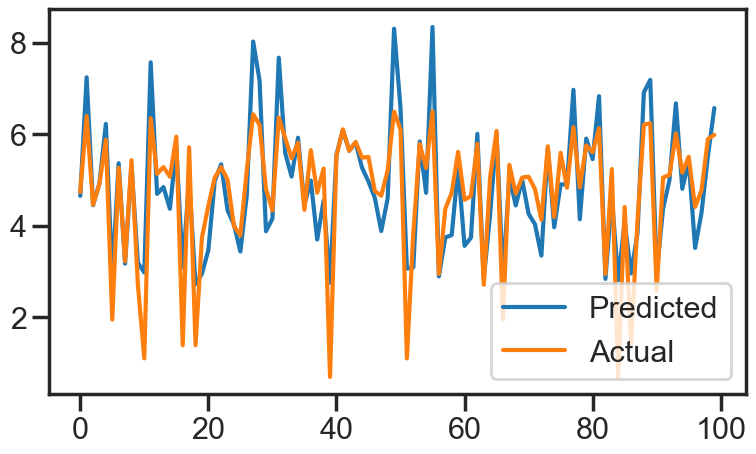

In [73]:
    plt.figure(figsize=(9,5))
    plt.plot((lr_y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [74]:
model1 = [
    {
        'Model': 'Linear_Regression',
        'R2_score': r2, 
        'Adjusted_R2_train': ADJ_R2,
        'MSE': MSE,
        'RMSE': RMSE
    }
]
model_score = pd.DataFrame(model1)
model_score

Model  R2_score  Adjusted_R2_train       MSE      RMSE
0  Linear_Regression  0.734205           0.733452  0.545395  0.738508

## 2. KNeighborsRegressor  

In [75]:
knr_model = KNeighborsRegressor()

In [76]:
knr_model.fit(X_train, Y_train)

KNeighborsRegressor()

In [77]:
knr_y_pred = knr_model.predict(X_test)
knr_y_pred

array([4.42618163, 6.16093336, 4.22370137, ..., 5.00585922, 5.9705973 ,
       5.02352223])

In [78]:
MSE_knr = mean_squared_error(Y_test, knr_y_pred)
MSE_knr

0.2604435270805286

In [79]:
RMSE_knr = np.sqrt(MSE_knr)
RMSE_knr

0.5103366801245317

In [80]:
r2_knr = r2_score(Y_test, knr_y_pred)
r2_knr

0.8730744409388529

In [81]:
ADJ_R2_knr = 1-(1-r2_score(Y_test, knr_y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
ADJ_R2_knr

0.8727148784485947

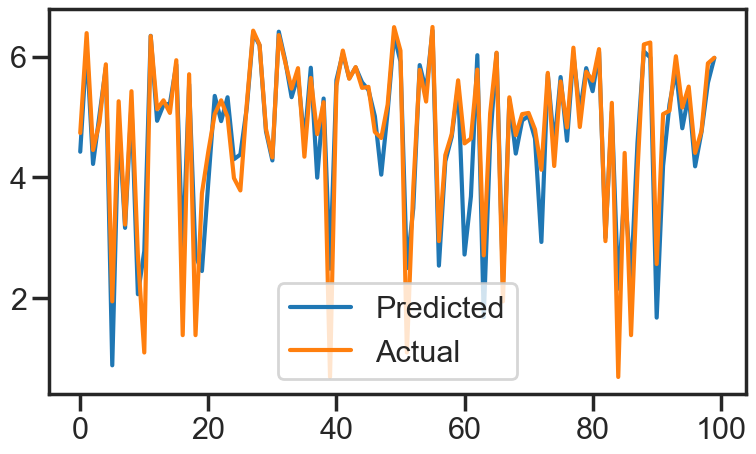

In [82]:
    plt.figure(figsize=(9,5))
    plt.plot((knr_y_pred)[:100])
    plt.plot((np.array(Y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()

In [83]:
model2 = [
    {
        'Model': 'KNeighborsRegressor',
        'R2_score': r2_knr, 
        'Adjusted_R2_train': ADJ_R2_knr,
        'MSE': MSE_knr,
        'RMSE': RMSE_knr
    }
]
# Convert the new data to a DataFrame
new_model_df = pd.DataFrame(model2)

# Concatenate the existing DataFrame with the new data
model_score = pd.concat([model_score, new_model_df], ignore_index=True)

model_score

Model  R2_score  Adjusted_R2_train       MSE      RMSE
0    Linear_Regression  0.734205           0.733452  0.545395  0.738508
1  KNeighborsRegressor  0.873074           0.872715  0.260444  0.510337